## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: Aug. 27th, 2020/4:00-4:45 (CDT)
* Instructor name: Yish Lim
* Blog post URL: in progress
* data (too big to be operative)
    * 2020 April - 2020 Aug 9th     (IL stay-at-home order for COVID-19 starts taking effect)
    * 2020 Mar ----------------     (pandemic arose)
    * 2019 Dec - 2020 Feb           (Holiday season)
    * 2019 Sep - 2019 Nov           (Fall)
    * 2019 Jun - 2019 Aug           (Summer)
    * 2019 Mar - 2019 May           (Spring)

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
dfcovid = pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final.csv')
dfcovid.set_index('index', inplace=True)
dfcovid.head()

,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,MODEL,...,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE
index,,,,,,,,,,,,,,,,,,,,,
53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,101,...,0.0,0.0,1.0,0,1,0,0,1,1,1
54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,65,...,0.0,0.0,1.0,0,1,0,0,1,1,1
55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,101,...,0.0,0.0,1.0,0,1,0,0,1,1,1
56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,65,...,0.0,0.0,1.0,0,1,0,0,1,1,1
176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,37,...,0.0,0.0,0.0,1,0,0,0,1,1,1


In [3]:
dfcovid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 53 to 140632
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    2891 non-null   object 
 1   STATE                   2891 non-null   object 
 2   ZIPCODE                 2891 non-null   int64  
 3   AGE                     2891 non-null   float64
 4   EJECTION                2891 non-null   float64
 5   DRIVER_ACTION           2891 non-null   float64
 6   BAC_RESULT              2891 non-null   float64
 7   UNIT_TYPE               2891 non-null   int64  
 8   MAKE                    2891 non-null   int64  
 9   MODEL                   2891 non-null   int64  
 10  VEHICLE_YEAR            2891 non-null   float64
 11  VEHICLE_TYPE            2891 non-null   int64  
 12  TRAVEL_DIRECTION        2891 non-null   int64  
 13  MANEUVER                2891 non-null   int64  
 14  FIRST_CONTACT_POINT     2891 non-null

In [4]:
numcols_list = ['ZIPCODE','AGE','VEHICLE_YEAR','POSTED_SPEED_LIMIT','NUM_UNITS','CRASH_HOUR','CRASH_DAY_OF_WEEK',
                'CRASH_MONTH','CRASH_YEAR']
objcols_list = ['CITY','STATE']

def convert_dtypes(df):
    df_clone = df.copy()
    
    for col in df_clone.columns:
        if col not in numcols_list and col not in objcols_list:
            df_clone[col] = df_clone[col].astype('category')
        
    return df_clone

In [5]:
dfcovid1 = convert_dtypes(dfcovid)
cate_df = dfcovid1.select_dtypes(include=['category']).copy()
cate_df.columns

Index(['EJECTION', 'DRIVER_ACTION', 'BAC_RESULT', 'UNIT_TYPE', 'MAKE', 'MODEL',
       'VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'MANEUVER', 'FIRST_CONTACT_POINT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'STREET_DIRECTION',
       'FATAL_INBOTH', 'FATAL_CARPPL', 'FATAL_OTHPPL', 'FATAL_INAUTO',
       'FATAL_DEGREE', 'DAMAGE_500_OR_LESS', 'DAMAGE_501_1500',
       'DAMAGE_OVER_1500', 'SEX', 'INTERSECTION_RELATED', 'HIT_AND_RUN',
       'REPORTYPE'],
      dtype='object')

In [6]:
dfcovid1.to_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')

In [7]:
dfcovid1.dtypes

CITY                        object
STATE                       object
ZIPCODE                      int64
AGE                        float64
EJECTION                  category
DRIVER_ACTION             category
BAC_RESULT                category
UNIT_TYPE                 category
MAKE                      category
MODEL                     category
VEHICLE_YEAR               float64
VEHICLE_TYPE              category
TRAVEL_DIRECTION          category
MANEUVER                  category
FIRST_CONTACT_POINT       category
POSTED_SPEED_LIMIT           int64
TRAFFIC_CONTROL_DEVICE    category
DEVICE_CONDITION          category
WEATHER_CONDITION         category
LIGHTING_CONDITION        category
FIRST_CRASH_TYPE          category
TRAFFICWAY_TYPE           category
ALIGNMENT                 category
ROADWAY_SURFACE_COND      category
ROAD_DEFECT               category
STREET_DIRECTION          category
NUM_UNITS                    int64
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK   

# EDA Q1: What are Top 10 features for crash causes and fatal levels?
## with NaN and/or unknown included

In [8]:
cateFeatures = set()
for col in dfcovid1.columns:
    if dfcovid1[col].dtype.name == 'category':
        indices_list = dfcovid[col].value_counts().index.tolist()
        if -1 in indices_list or 0 in indices_list:
            cateFeatures.add(col)
                    
cateFeatures_list = list(cateFeatures)
print(len(cateFeatures_list))
cateFeatures_list

28


['EJECTION',
 'VEHICLE_TYPE',
 'FATAL_OTHPPL',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'MAKE',
 'DAMAGE_501_1500',
 'DRIVER_ACTION',
 'BAC_RESULT',
 'UNIT_TYPE',
 'ROAD_DEFECT',
 'HIT_AND_RUN',
 'ROADWAY_SURFACE_COND',
 'FATAL_INAUTO',
 'REPORTYPE',
 'SEX',
 'DAMAGE_500_OR_LESS',
 'FIRST_CONTACT_POINT',
 'FATAL_DEGREE',
 'DAMAGE_OVER_1500',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'DEVICE_CONDITION',
 'TRAFFICWAY_TYPE',
 'TRAFFIC_CONTROL_DEVICE',
 'FATAL_INBOTH',
 'FATAL_CARPPL',
 'INTERSECTION_RELATED']

## with NaN and unknown excluded

In [9]:
compFeatures = set()
for col in dfcovid1.columns:
    if dfcovid1[col].dtype.name == 'category':
        indices_list = dfcovid[col].value_counts().index.tolist()
        if -1 not in indices_list and 0 not in indices_list:
            compFeatures.add(col)
            
compFeatures_list = list(compFeatures)
print(len(compFeatures_list))
compFeatures_list

4


['STREET_DIRECTION', 'FIRST_CRASH_TYPE', 'ALIGNMENT', 'MODEL']

## combine two lists above

In [10]:
allcateFeatures_list = cateFeatures_list + compFeatures_list
print(len(allcateFeatures_list))
allcateFeatures_list

32


['EJECTION',
 'VEHICLE_TYPE',
 'FATAL_OTHPPL',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'MAKE',
 'DAMAGE_501_1500',
 'DRIVER_ACTION',
 'BAC_RESULT',
 'UNIT_TYPE',
 'ROAD_DEFECT',
 'HIT_AND_RUN',
 'ROADWAY_SURFACE_COND',
 'FATAL_INAUTO',
 'REPORTYPE',
 'SEX',
 'DAMAGE_500_OR_LESS',
 'FIRST_CONTACT_POINT',
 'FATAL_DEGREE',
 'DAMAGE_OVER_1500',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'DEVICE_CONDITION',
 'TRAFFICWAY_TYPE',
 'TRAFFIC_CONTROL_DEVICE',
 'FATAL_INBOTH',
 'FATAL_CARPPL',
 'INTERSECTION_RELATED',
 'STREET_DIRECTION',
 'FIRST_CRASH_TYPE',
 'ALIGNMENT',
 'MODEL']


-------------------------------------------------------------------------------------------------------------------------------

* Fatal degrees:

    * Fatal in both : vehicle + driver + passenger(s) in crash

    * Fatal car ppl : driver + passenger(s) only in crash

    * Fatal oth ppl : pedestrian(s) + bicyclist(s) only in crash

    * Fatal in auto : vehicle only in crash
    
-------------------------------------------------------------------------------------------------------------------------------
    
* Damage cost:

    * Damage < 500
    
    * Damage < 1500 and Damage > 501
    
    * Damage > 1500
    
-------------------------------------------------------------------------------------------------------------------------------

* Fatal degrees and damage cost are both categorized into target features


In [11]:
fatals_list = ['FATAL_DEGREE','FATAL_INBOTH','FATAL_CARPPL','FATAL_OTHPPL','FATAL_INAUTO']
damage_list = ['DAMAGE_500_OR_LESS','DAMAGE_501_1500','DAMAGE_OVER_1500']

def sel_top10_features(df, cateList, degree=0):
    df_clone = df.copy()
    cols_dict = {}
    for idx, row in df_clone.iterrows():
        for cate in cateList:
            if cate not in fatals_list and cate not in damage_list and (row[cate] > 0) and row['FATAL_DEGREE'] == degree:
                cols_dict[cate] = cols_dict.get(cate, 0) + 1
            
    print(cols_dict,'\n')
    sorted_cols_list = sorted(cols_dict, key=cols_dict.get, reverse=True)[:10]
    sorted_cols_dict = {k:v for k, v in sorted(cols_dict.items(), key=lambda x:x[1], reverse=True)[:10]}
    print(sorted_cols_dict)
    
    return sorted_cols_dict

## Fatal Degree Class-0

### only categorical features with NaN and/or unknown 

{'VEHICLE_TYPE': 850, 'TRAVEL_DIRECTION': 847, 'MANEUVER': 848, 'MAKE': 850, 'UNIT_TYPE': 851, 'HIT_AND_RUN': 739, 'ROADWAY_SURFACE_COND': 850, 'REPORTYPE': 466, 'FIRST_CONTACT_POINT': 842, 'WEATHER_CONDITION': 849, 'LIGHTING_CONDITION': 851, 'DEVICE_CONDITION': 730, 'TRAFFICWAY_TYPE': 535, 'TRAFFIC_CONTROL_DEVICE': 762, 'INTERSECTION_RELATED': 817, 'SEX': 493, 'DRIVER_ACTION': 132, 'BAC_RESULT': 14, 'ROAD_DEFECT': 5, 'EJECTION': 1} 

{'UNIT_TYPE': 851, 'LIGHTING_CONDITION': 851, 'VEHICLE_TYPE': 850, 'MAKE': 850, 'ROADWAY_SURFACE_COND': 850, 'WEATHER_CONDITION': 849, 'MANEUVER': 848, 'TRAVEL_DIRECTION': 847, 'FIRST_CONTACT_POINT': 842, 'INTERSECTION_RELATED': 817}


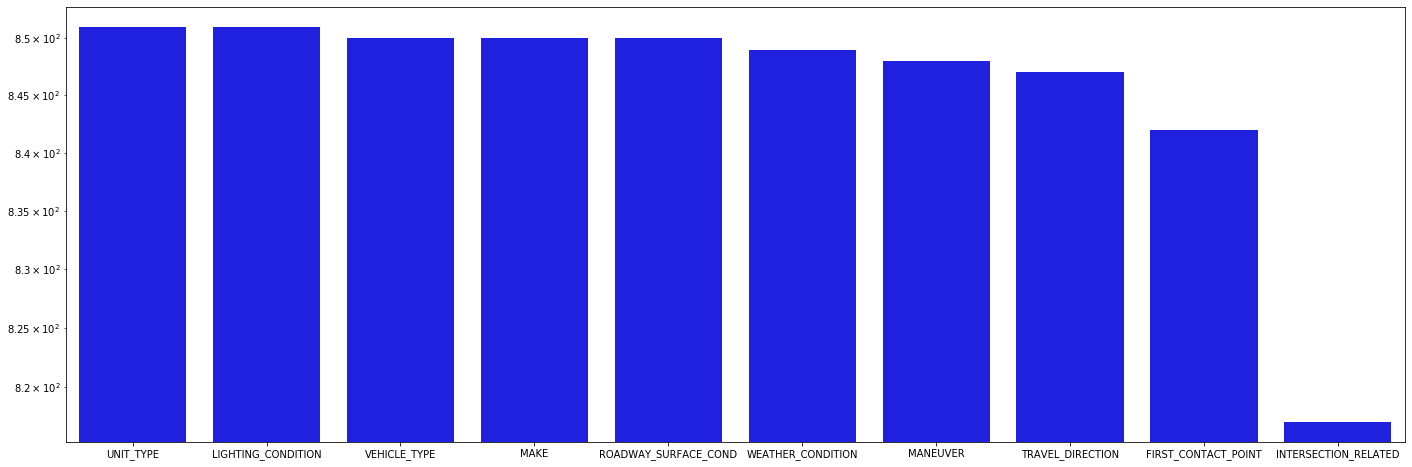

In [12]:
top10features_fatal_degree_0 = sel_top10_features(dfcovid1,cateFeatures_list,0)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10features_fatal_degree_0.keys()), y=list(top10features_fatal_degree_0.values()), color='blue')
g.set_yscale('log')

### all categorical features

{'VEHICLE_TYPE': 850, 'TRAVEL_DIRECTION': 847, 'MANEUVER': 848, 'MAKE': 850, 'UNIT_TYPE': 851, 'HIT_AND_RUN': 739, 'ROADWAY_SURFACE_COND': 850, 'REPORTYPE': 466, 'FIRST_CONTACT_POINT': 842, 'WEATHER_CONDITION': 849, 'LIGHTING_CONDITION': 851, 'DEVICE_CONDITION': 730, 'TRAFFICWAY_TYPE': 535, 'TRAFFIC_CONTROL_DEVICE': 762, 'INTERSECTION_RELATED': 817, 'STREET_DIRECTION': 851, 'FIRST_CRASH_TYPE': 851, 'ALIGNMENT': 851, 'MODEL': 851, 'SEX': 493, 'DRIVER_ACTION': 132, 'BAC_RESULT': 14, 'ROAD_DEFECT': 5, 'EJECTION': 1} 

{'UNIT_TYPE': 851, 'LIGHTING_CONDITION': 851, 'STREET_DIRECTION': 851, 'FIRST_CRASH_TYPE': 851, 'ALIGNMENT': 851, 'MODEL': 851, 'VEHICLE_TYPE': 850, 'MAKE': 850, 'ROADWAY_SURFACE_COND': 850, 'WEATHER_CONDITION': 849}


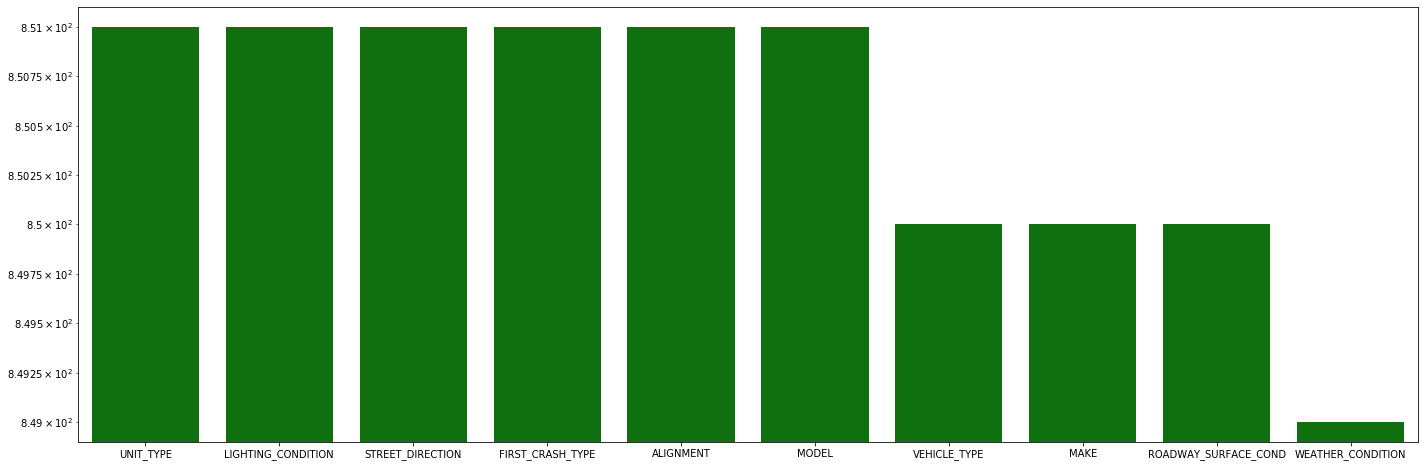

In [13]:
top10ALLfeatures_fatal_degree_0 = sel_top10_features(dfcovid1,allcateFeatures_list,0)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10ALLfeatures_fatal_degree_0.keys()), y=list(top10ALLfeatures_fatal_degree_0.values()), color='green')
g.set_yscale('log')

## Fatal Degree Class-1

### only categorical features with NaN and/or unknown 

{'TRAVEL_DIRECTION': 687, 'MAKE': 639, 'UNIT_TYPE': 699, 'HIT_AND_RUN': 634, 'ROADWAY_SURFACE_COND': 691, 'REPORTYPE': 479, 'FIRST_CONTACT_POINT': 649, 'WEATHER_CONDITION': 691, 'LIGHTING_CONDITION': 695, 'DEVICE_CONDITION': 596, 'TRAFFICWAY_TYPE': 518, 'TRAFFIC_CONTROL_DEVICE': 660, 'INTERSECTION_RELATED': 663, 'VEHICLE_TYPE': 626, 'MANEUVER': 669, 'DRIVER_ACTION': 246, 'SEX': 369, 'BAC_RESULT': 6, 'ROAD_DEFECT': 3, 'EJECTION': 4} 

{'UNIT_TYPE': 699, 'LIGHTING_CONDITION': 695, 'ROADWAY_SURFACE_COND': 691, 'WEATHER_CONDITION': 691, 'TRAVEL_DIRECTION': 687, 'MANEUVER': 669, 'INTERSECTION_RELATED': 663, 'TRAFFIC_CONTROL_DEVICE': 660, 'FIRST_CONTACT_POINT': 649, 'MAKE': 639}


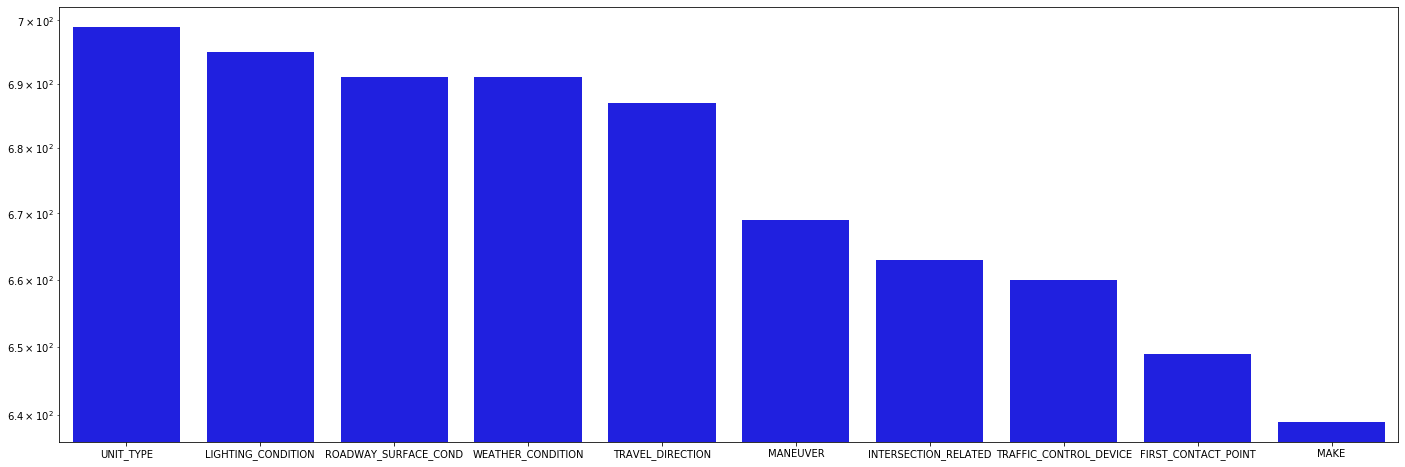

In [14]:
top10features_fatal_degree_1 = sel_top10_features(dfcovid1,cateFeatures_list,1)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10features_fatal_degree_1.keys()), y=list(top10features_fatal_degree_1.values()), color='blue')
g.set_yscale('log')

### all categorical features

{'TRAVEL_DIRECTION': 687, 'MAKE': 639, 'UNIT_TYPE': 699, 'HIT_AND_RUN': 634, 'ROADWAY_SURFACE_COND': 691, 'REPORTYPE': 479, 'FIRST_CONTACT_POINT': 649, 'WEATHER_CONDITION': 691, 'LIGHTING_CONDITION': 695, 'DEVICE_CONDITION': 596, 'TRAFFICWAY_TYPE': 518, 'TRAFFIC_CONTROL_DEVICE': 660, 'INTERSECTION_RELATED': 663, 'STREET_DIRECTION': 699, 'FIRST_CRASH_TYPE': 699, 'ALIGNMENT': 699, 'MODEL': 699, 'VEHICLE_TYPE': 626, 'MANEUVER': 669, 'DRIVER_ACTION': 246, 'SEX': 369, 'BAC_RESULT': 6, 'ROAD_DEFECT': 3, 'EJECTION': 4} 

{'UNIT_TYPE': 699, 'STREET_DIRECTION': 699, 'FIRST_CRASH_TYPE': 699, 'ALIGNMENT': 699, 'MODEL': 699, 'LIGHTING_CONDITION': 695, 'ROADWAY_SURFACE_COND': 691, 'WEATHER_CONDITION': 691, 'TRAVEL_DIRECTION': 687, 'MANEUVER': 669}


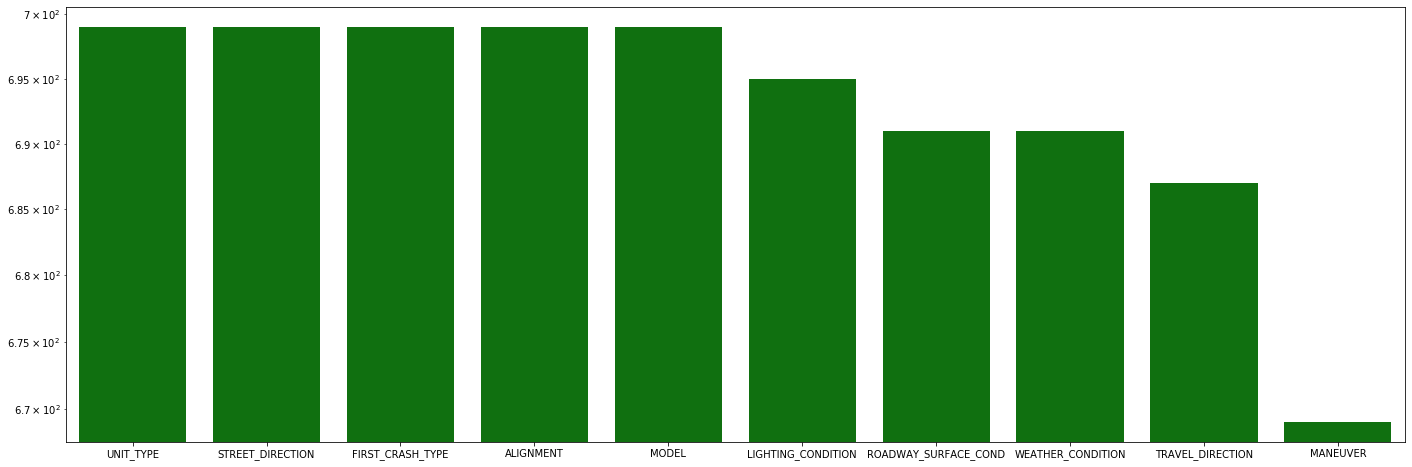

In [15]:
top10ALLfeatures_fatal_degree_1 = sel_top10_features(dfcovid1,allcateFeatures_list,1)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10ALLfeatures_fatal_degree_1.keys()), y=list(top10ALLfeatures_fatal_degree_1.values()), color='green')
g.set_yscale('log')

## Fatal Degree Class-2

### only categorical features with NaN and/or unknown

{'TRAVEL_DIRECTION': 808, 'MAKE': 714, 'UNIT_TYPE': 817, 'HIT_AND_RUN': 748, 'REPORTYPE': 592, 'FIRST_CONTACT_POINT': 722, 'WEATHER_CONDITION': 798, 'LIGHTING_CONDITION': 810, 'DEVICE_CONDITION': 654, 'TRAFFICWAY_TYPE': 582, 'TRAFFIC_CONTROL_DEVICE': 706, 'INTERSECTION_RELATED': 782, 'DRIVER_ACTION': 331, 'SEX': 482, 'VEHICLE_TYPE': 702, 'MANEUVER': 787, 'ROADWAY_SURFACE_COND': 771, 'BAC_RESULT': 15, 'EJECTION': 16, 'ROAD_DEFECT': 4} 

{'UNIT_TYPE': 817, 'LIGHTING_CONDITION': 810, 'TRAVEL_DIRECTION': 808, 'WEATHER_CONDITION': 798, 'MANEUVER': 787, 'INTERSECTION_RELATED': 782, 'ROADWAY_SURFACE_COND': 771, 'HIT_AND_RUN': 748, 'FIRST_CONTACT_POINT': 722, 'MAKE': 714}


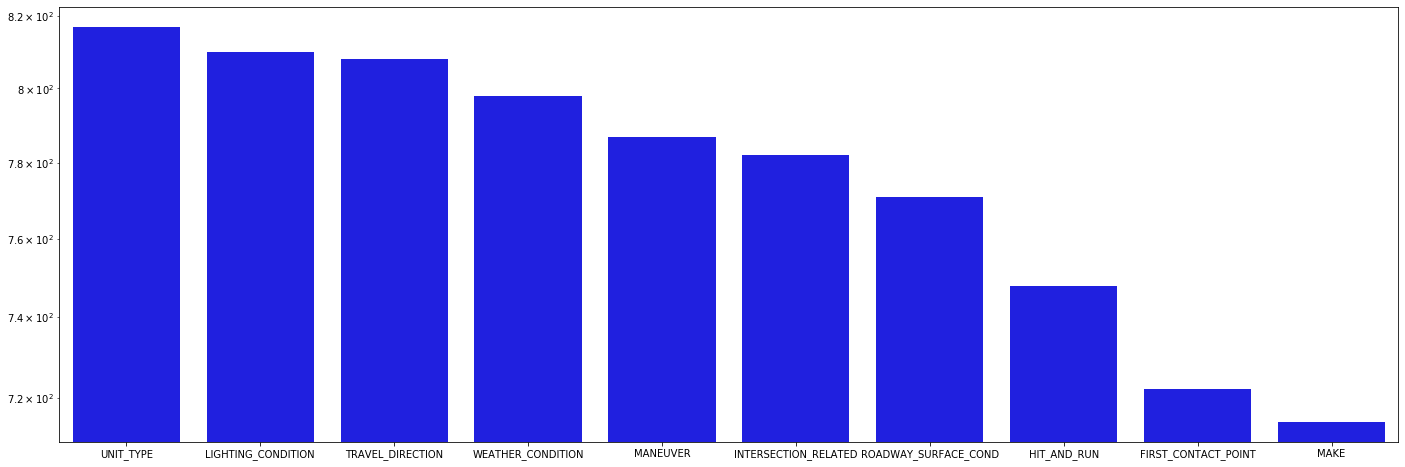

In [16]:
top10features_fatal_degree_2 = sel_top10_features(dfcovid1,cateFeatures_list,2)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10features_fatal_degree_2.keys()), y=list(top10features_fatal_degree_2.values()), color='blue')
g.set_yscale('log')

### all categorical features

{'TRAVEL_DIRECTION': 808, 'MAKE': 714, 'UNIT_TYPE': 817, 'HIT_AND_RUN': 748, 'REPORTYPE': 592, 'FIRST_CONTACT_POINT': 722, 'WEATHER_CONDITION': 798, 'LIGHTING_CONDITION': 810, 'DEVICE_CONDITION': 654, 'TRAFFICWAY_TYPE': 582, 'TRAFFIC_CONTROL_DEVICE': 706, 'INTERSECTION_RELATED': 782, 'STREET_DIRECTION': 817, 'FIRST_CRASH_TYPE': 817, 'ALIGNMENT': 817, 'MODEL': 817, 'DRIVER_ACTION': 331, 'SEX': 482, 'VEHICLE_TYPE': 702, 'MANEUVER': 787, 'ROADWAY_SURFACE_COND': 771, 'BAC_RESULT': 15, 'EJECTION': 16, 'ROAD_DEFECT': 4} 

{'UNIT_TYPE': 817, 'STREET_DIRECTION': 817, 'FIRST_CRASH_TYPE': 817, 'ALIGNMENT': 817, 'MODEL': 817, 'LIGHTING_CONDITION': 810, 'TRAVEL_DIRECTION': 808, 'WEATHER_CONDITION': 798, 'MANEUVER': 787, 'INTERSECTION_RELATED': 782}


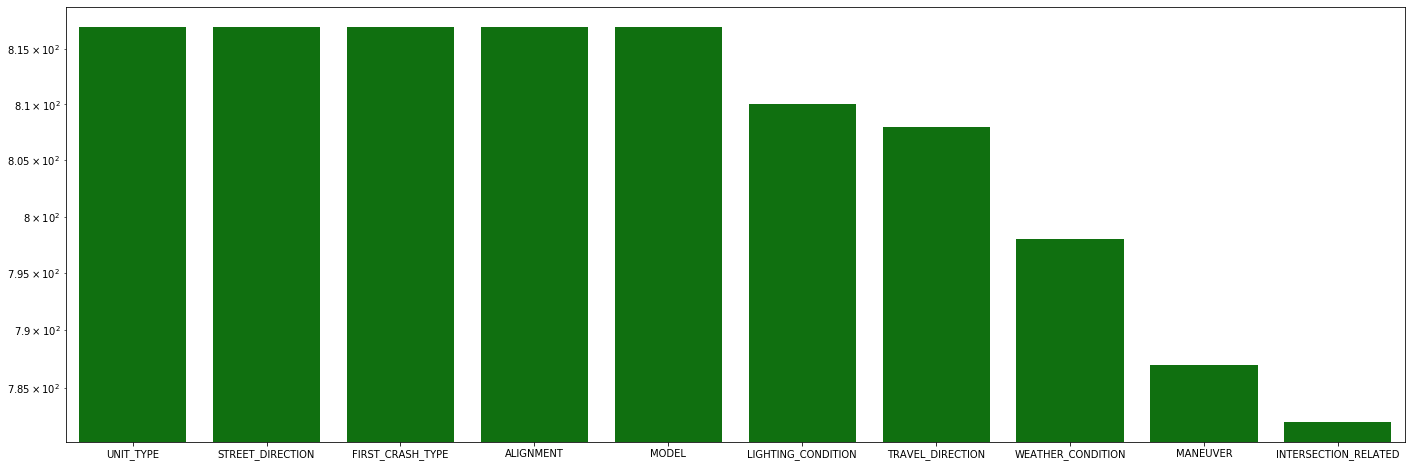

In [17]:
top10ALLfeatures_fatal_degree_2 = sel_top10_features(dfcovid1,allcateFeatures_list,2)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10ALLfeatures_fatal_degree_2.keys()), y=list(top10ALLfeatures_fatal_degree_2.values()), color='green')
g.set_yscale('log')

## Fatal Degree Class-3

### only categorical features with NaN and/or unknown

{'VEHICLE_TYPE': 459, 'TRAVEL_DIRECTION': 504, 'MANEUVER': 486, 'MAKE': 457, 'DRIVER_ACTION': 200, 'UNIT_TYPE': 520, 'HIT_AND_RUN': 432, 'ROADWAY_SURFACE_COND': 517, 'REPORTYPE': 415, 'SEX': 306, 'FIRST_CONTACT_POINT': 437, 'WEATHER_CONDITION': 520, 'LIGHTING_CONDITION': 524, 'DEVICE_CONDITION': 425, 'TRAFFICWAY_TYPE': 399, 'TRAFFIC_CONTROL_DEVICE': 444, 'INTERSECTION_RELATED': 506, 'EJECTION': 16, 'BAC_RESULT': 12, 'ROAD_DEFECT': 13} 

{'LIGHTING_CONDITION': 524, 'UNIT_TYPE': 520, 'WEATHER_CONDITION': 520, 'ROADWAY_SURFACE_COND': 517, 'INTERSECTION_RELATED': 506, 'TRAVEL_DIRECTION': 504, 'MANEUVER': 486, 'VEHICLE_TYPE': 459, 'MAKE': 457, 'TRAFFIC_CONTROL_DEVICE': 444}


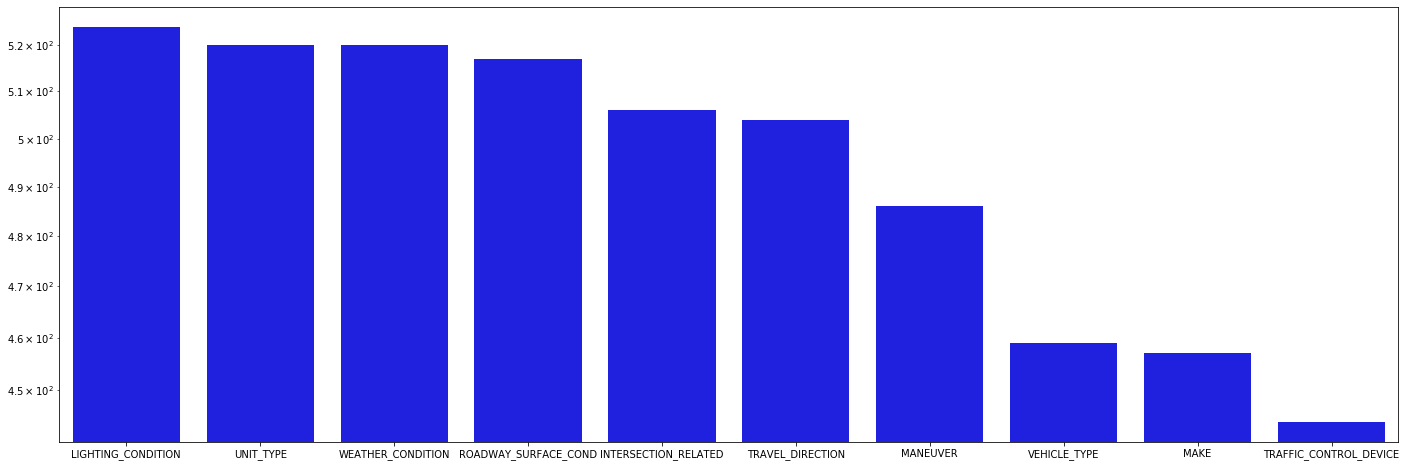

In [18]:
top10features_fatal_degree_3 = sel_top10_features(dfcovid1,cateFeatures_list,3)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10features_fatal_degree_3.keys()), y=list(top10features_fatal_degree_3.values()), color='blue')
g.set_yscale('log')

### all categorical features

{'VEHICLE_TYPE': 459, 'TRAVEL_DIRECTION': 504, 'MANEUVER': 486, 'MAKE': 457, 'DRIVER_ACTION': 200, 'UNIT_TYPE': 520, 'HIT_AND_RUN': 432, 'ROADWAY_SURFACE_COND': 517, 'REPORTYPE': 415, 'SEX': 306, 'FIRST_CONTACT_POINT': 437, 'WEATHER_CONDITION': 520, 'LIGHTING_CONDITION': 524, 'DEVICE_CONDITION': 425, 'TRAFFICWAY_TYPE': 399, 'TRAFFIC_CONTROL_DEVICE': 444, 'INTERSECTION_RELATED': 506, 'STREET_DIRECTION': 524, 'FIRST_CRASH_TYPE': 524, 'ALIGNMENT': 524, 'MODEL': 524, 'EJECTION': 16, 'BAC_RESULT': 12, 'ROAD_DEFECT': 13} 

{'LIGHTING_CONDITION': 524, 'STREET_DIRECTION': 524, 'FIRST_CRASH_TYPE': 524, 'ALIGNMENT': 524, 'MODEL': 524, 'UNIT_TYPE': 520, 'WEATHER_CONDITION': 520, 'ROADWAY_SURFACE_COND': 517, 'INTERSECTION_RELATED': 506, 'TRAVEL_DIRECTION': 504}


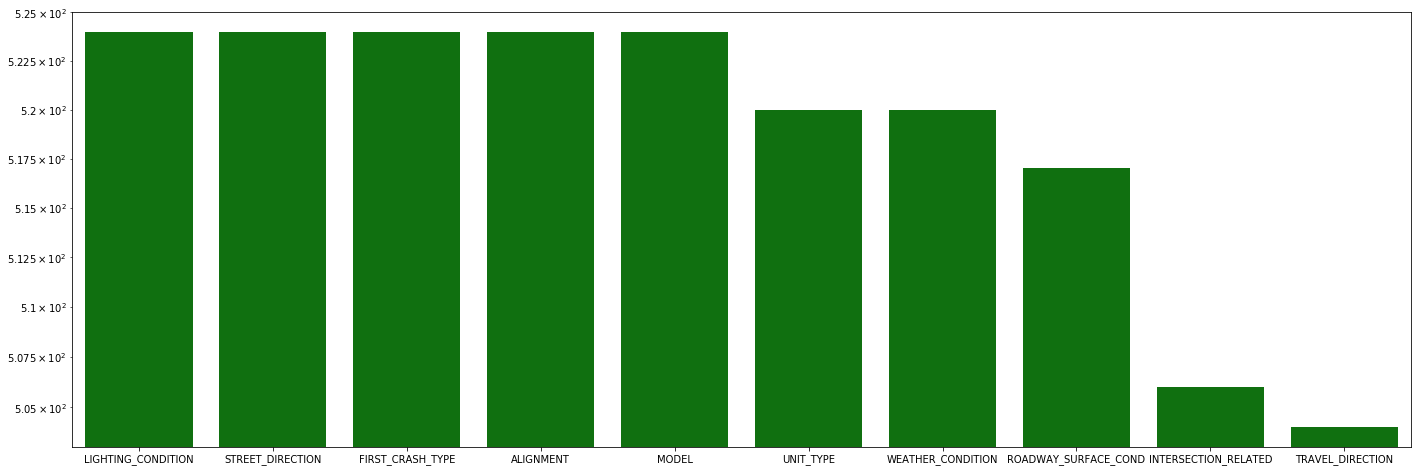

In [19]:
top10ALLfeatures_fatal_degree_3 = sel_top10_features(dfcovid1,allcateFeatures_list,3)
plt.figure(figsize=(24,8))
g = sns.barplot(x=list(top10ALLfeatures_fatal_degree_3.keys()), y=list(top10ALLfeatures_fatal_degree_3.values()), color='green')
g.set_yscale('log')

# EDA Q2: In COVID-19 outbreak, why did traffic accidents still take place?

Illinois Stay at Home order went into effect on March 21st, 2020
   
   * LIGHTING_CONDITION
   
   * FIRST_CRASH_TYPE
   
   * STREET_DIRECTION
   
   * ALIGNMENT
   
   * MODEL
   
   * ROADWAY_SURFACE_COND
   
   * WEATHER_CONDITION
   
   * TRAVEL_DIRECTION
   
   * INTERSECTION_RELATED
   
   * MANEUVER
   
   * HIT_AND_RUN
   
   * VEHICLE_TYPE
   
   * UNIT_TYPE
   
   * TRAFFIC_CONTROL_DEVICE
   
   * FIRST_CONTACT_POINT
   

## Fatal Degree Class-0

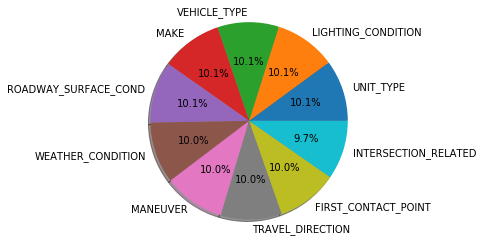

In [20]:
labels = list(top10features_fatal_degree_0.keys())
sizes = list(top10features_fatal_degree_0.values())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

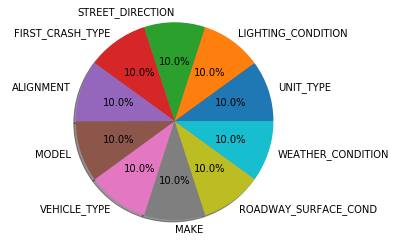

In [21]:
labels = list(top10ALLfeatures_fatal_degree_0.keys())
sizes = list(top10ALLfeatures_fatal_degree_0.values())
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax2.axis('equal')
plt.show()

### Lighting condition

[1, 2, 3, 4, 5] [592, 192, 29, 25, 13]


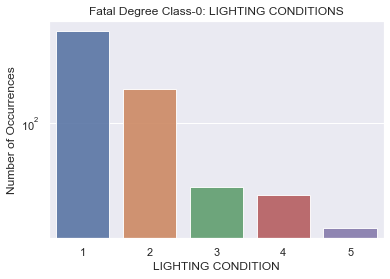

In [22]:
df_fatal_degree_class_0 = dfcovid1[dfcovid1['FATAL_DEGREE']==0]
counts = df_fatal_degree_class_0['LIGHTING_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: LIGHTING CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LIGHTING CONDITION', fontsize=12)
plt.show()

### First crash type

[2, 3, 1, 4, 6, 7, 11, 12, 8, 9, 10, 13, 5] [242, 223, 218, 96, 26, 20, 10, 7, 6, 2, 1, 0, 0]


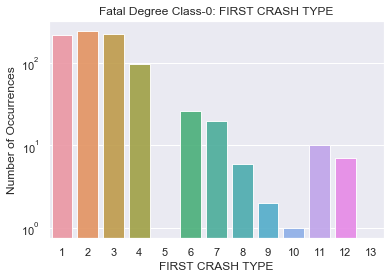

In [23]:
counts = df_fatal_degree_class_0['FIRST_CRASH_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: FIRST CRASH TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CRASH TYPE', fontsize=12)
plt.show()

### Street direction

[1, 2, 3, 4] [394, 278, 125, 54]


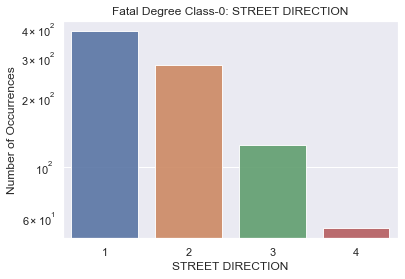

In [24]:
counts = df_fatal_degree_class_0['STREET_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: STREET DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('STREET DIRECTION', fontsize=12)
plt.show()

### Alignment

[1, 2, 3, 4] [832, 16, 2, 1]


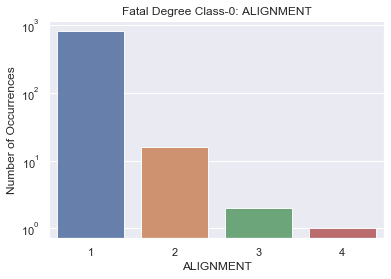

In [25]:
counts = df_fatal_degree_class_0['ALIGNMENT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: ALIGNMENT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ALIGNMENT', fontsize=12)
plt.show()

### Weather condition

[1, 2, 3, 4] [719, 107, 20, 3]


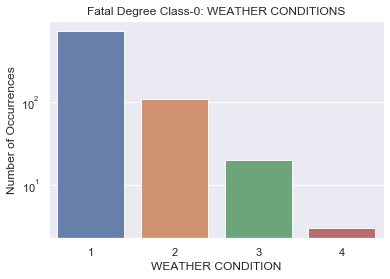

In [26]:
counts = df_fatal_degree_class_0['WEATHER_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: WEATHER CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('WEATHER CONDITION', fontsize=12)
plt.show()

### Roadway surface condition

[1, 2, 3] [723, 126, 1]


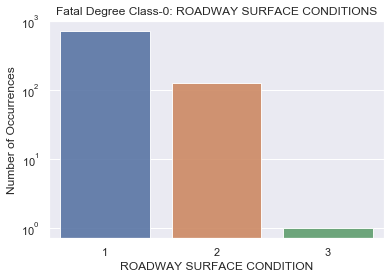

In [27]:
counts = df_fatal_degree_class_0['ROADWAY_SURFACE_COND'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: ROADWAY SURFACE CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ROADWAY SURFACE CONDITION', fontsize=12)
plt.show()

### Intersection-related

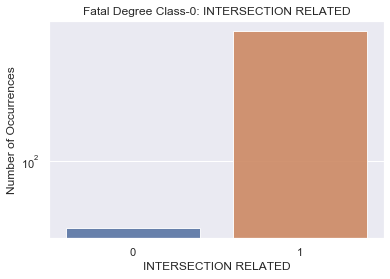

In [28]:
counts = df_fatal_degree_class_0['INTERSECTION_RELATED'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: INTERSECTION RELATED')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('INTERSECTION RELATED', fontsize=12)
plt.show()

### Travel direction

[2, 1, 3, 4, 8, 6, 5, 7] [225, 225, 201, 161, 10, 10, 8, 7]


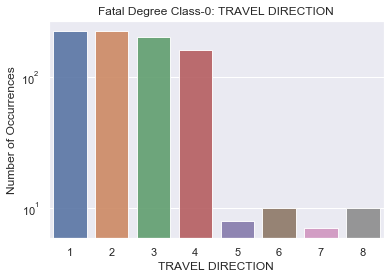

In [29]:
counts = df_fatal_degree_class_0['TRAVEL_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: TRAVEL DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAVEL DIRECTION', fontsize=12)
plt.show()

### Maneuver

[1, 3, 2, 4, 5, 7, 6, 8, 9, 16, 10, 12, 13, 17] [518, 134, 83, 39, 24, 13, 10, 9, 7, 3, 3, 2, 2, 1]


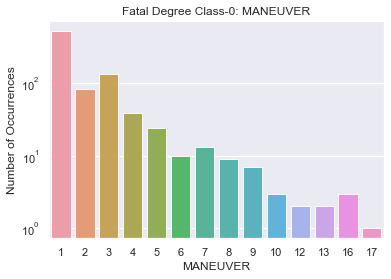

In [30]:
counts = df_fatal_degree_class_0['MANEUVER'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: MANEUVER')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MANEUVER', fontsize=12)
plt.show()

### Unit type

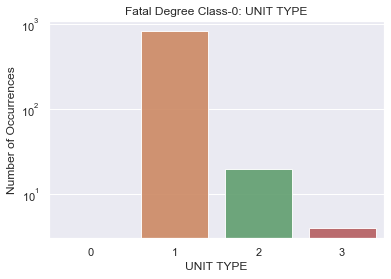

In [31]:
counts = df_fatal_degree_class_0['UNIT_TYPE'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: UNIT TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('UNIT TYPE', fontsize=12)
plt.show()

### Hit and run

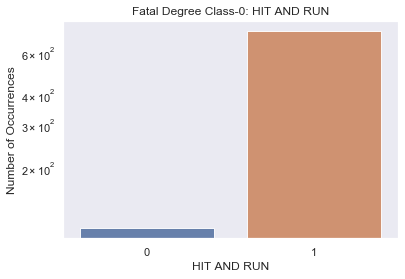

In [32]:
counts = df_fatal_degree_class_0['HIT_AND_RUN'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: HIT AND RUN')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HIT AND RUN', fontsize=12)
plt.show()

### First contact point

[1, 2, 3, 4, 6, 5, 7, 9, 8, 11, 10, 12] [183, 152, 103, 88, 58, 56, 52, 39, 37, 27, 26, 21]


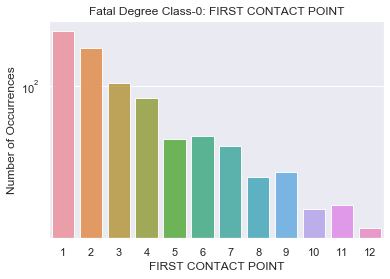

In [33]:
counts = df_fatal_degree_class_0['FIRST_CONTACT_POINT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: FIRST CONTACT POINT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CONTACT POINT', fontsize=12)
plt.show()

### Traffic control device

[1, 2, 3, 6, 4] [557, 197, 8, 0, 0]


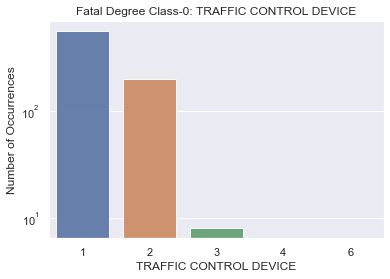

In [34]:
counts = df_fatal_degree_class_0['TRAFFIC_CONTROL_DEVICE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: TRAFFIC CONTROL DEVICE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAFFIC CONTROL DEVICE', fontsize=12)
plt.show()

### Vehicle type

[1, 2, 3, 4, 7, 6, 5, 8, 10, 9, 11] [645, 119, 40, 20, 8, 7, 4, 3, 2, 2, 0]


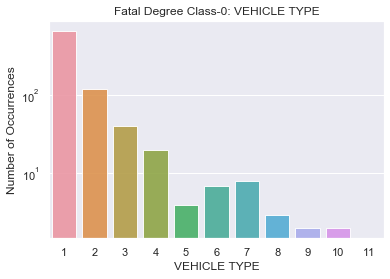

In [35]:
counts = df_fatal_degree_class_0['VEHICLE_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: VEHICLE TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('VEHICLE TYPE', fontsize=12)
plt.show()

### BAC result

[1, 2] [8, 6]


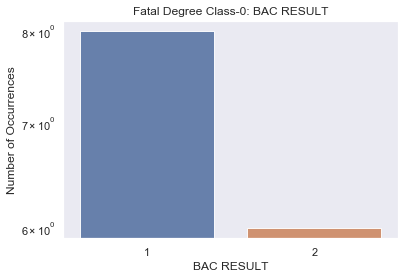

In [36]:
counts = df_fatal_degree_class_0['BAC_RESULT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-0: BAC RESULT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BAC RESULT', fontsize=12)
plt.show()

### correlation

In [37]:
cc0_df = df_fatal_degree_class_0.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc0_df.head())
cc0_df['pairs'] = list(zip(cc0_df.level_0, cc0_df.level_1))
cc0pairs_df = cc0_df.set_index('pairs')
cc0pairs_df = cc0pairs_df.drop(['level_1', 'level_0'], axis=1)
cc0pairs_df.columns = ['cc']
cc0pairs_df = cc0pairs_df.drop_duplicates(keep='first')
cc0pairs_df.head()

               level_0             level_1         0
40          CRASH_HOUR             ZIPCODE  0.000814
5              ZIPCODE          CRASH_HOUR  0.000814
31  POSTED_SPEED_LIMIT         CRASH_MONTH  0.001321
59         CRASH_MONTH  POSTED_SPEED_LIMIT  0.001321
10                 AGE        VEHICLE_YEAR  0.002504


,cc
pairs,
"(CRASH_HOUR, ZIPCODE)",0.000814
"(POSTED_SPEED_LIMIT, CRASH_MONTH)",0.001321
"(AGE, VEHICLE_YEAR)",0.002504
"(POSTED_SPEED_LIMIT, CRASH_HOUR)",0.004114
"(VEHICLE_YEAR, CRASH_MONTH)",0.009389


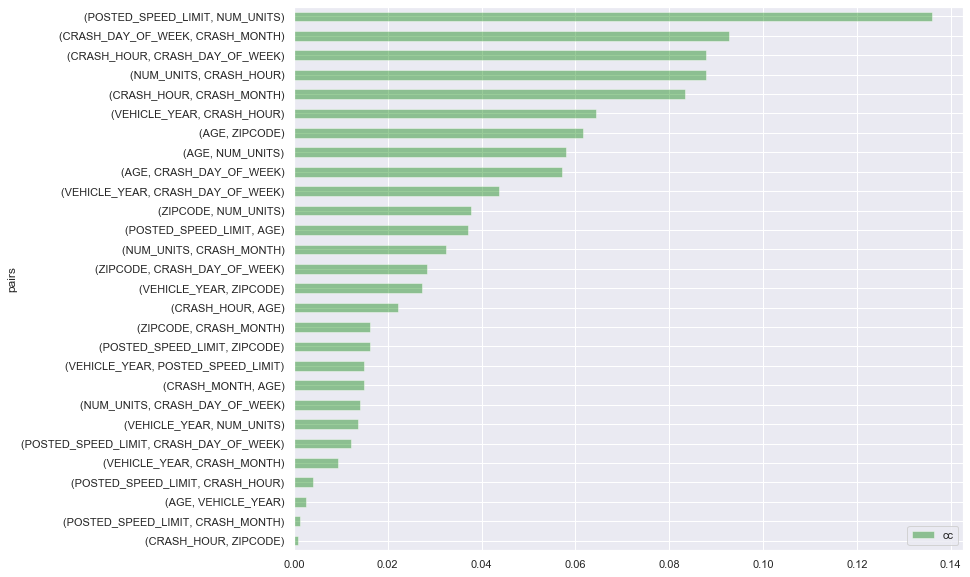

In [38]:
cc0pairs_update_df = cc0pairs_df[cc0pairs_df.cc<1]
cc0pairs_update_df.plot.barh(figsize=(12,10), color='green', alpha=0.4)

## Fatal Degree Class-1

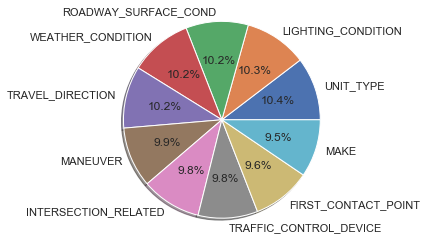

In [39]:
labels = list(top10features_fatal_degree_1.keys())
sizes = list(top10features_fatal_degree_1.values())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

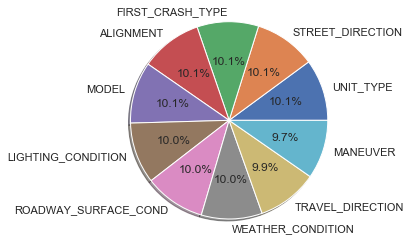

In [40]:
labels = list(top10ALLfeatures_fatal_degree_1.keys())
sizes = list(top10ALLfeatures_fatal_degree_1.values())
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax2.axis('equal')
plt.show()

### Lighting condition

[1, 2, 5, 3, 4] [384, 275, 19, 9, 8]


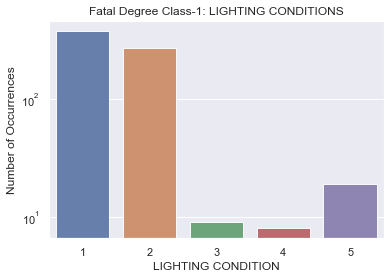

In [41]:
df_fatal_degree_class_1 = dfcovid1[dfcovid1['FATAL_DEGREE']==1]
counts = df_fatal_degree_class_1['LIGHTING_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: LIGHTING CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LIGHTING CONDITION', fontsize=12)
plt.show()

### First crash type

[1, 2, 3, 4, 6, 5, 9, 7, 10, 13, 12, 11, 8] [325, 148, 139, 34, 18, 14, 12, 7, 2, 0, 0, 0, 0]


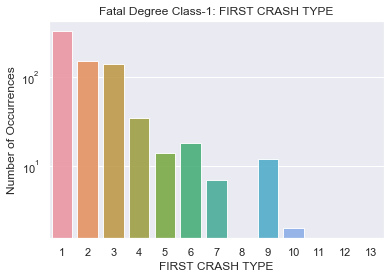

In [42]:
counts = df_fatal_degree_class_1['FIRST_CRASH_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: FIRST CRASH TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CRASH TYPE', fontsize=12)
plt.show()

### Street direction

[1, 2, 3, 4] [345, 261, 61, 32]


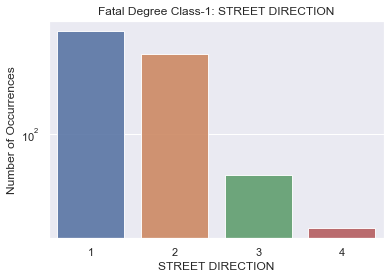

In [43]:
counts = df_fatal_degree_class_1['STREET_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: STREET DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('STREET DIRECTION', fontsize=12)
plt.show()

### Alignment

[1, 2, 3, 4] [677, 19, 3, 0]


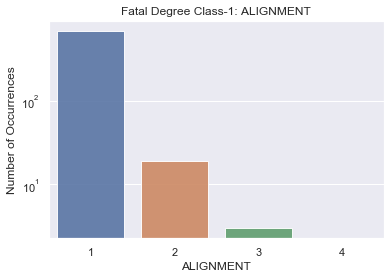

In [44]:
counts = df_fatal_degree_class_1['ALIGNMENT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: ALIGNMENT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ALIGNMENT', fontsize=12)
plt.show()

###  Weather condition

[1, 2, 3] [632, 41, 18]


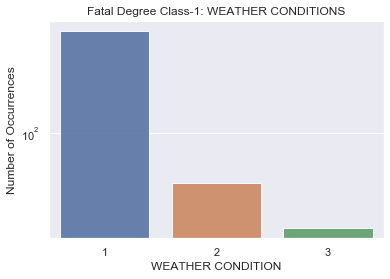

In [45]:
counts = df_fatal_degree_class_1['WEATHER_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: WEATHER CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('WEATHER CONDITION', fontsize=12)
plt.show()

### Roadway surface condition

[1, 2] [624, 67]


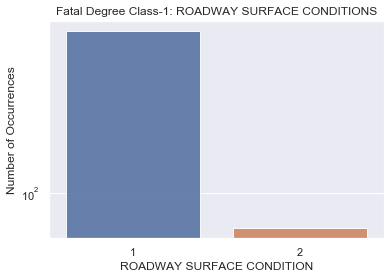

In [46]:
counts = df_fatal_degree_class_1['ROADWAY_SURFACE_COND'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: ROADWAY SURFACE CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ROADWAY SURFACE CONDITION', fontsize=12)
plt.show()

### Intersection-related

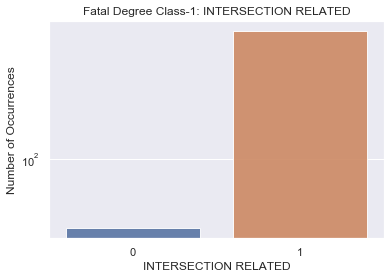

In [47]:
counts = df_fatal_degree_class_1['INTERSECTION_RELATED'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: INTERSECTION RELATED')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('INTERSECTION RELATED', fontsize=12)
plt.show()

### Travel direction

[1, 4, 3, 2, 8, 5, 6, 7] [179, 168, 165, 132, 17, 15, 10, 1]


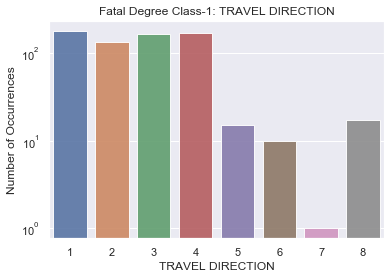

In [48]:
counts = df_fatal_degree_class_1['TRAVEL_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: TRAVEL DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAVEL DIRECTION', fontsize=12)
plt.show()

### Maneuver

[1, 3, 2, 4, 6, 5, 10, 14, 9, 8, 12, 7, 11, 16] [450, 74, 61, 27, 11, 9, 8, 7, 6, 4, 4, 3, 3, 2]


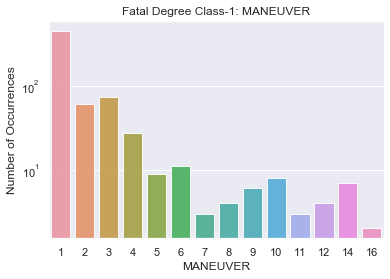

In [49]:
counts = df_fatal_degree_class_1['MANEUVER'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: MANEUVER')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MANEUVER', fontsize=12)
plt.show()

### Unit type

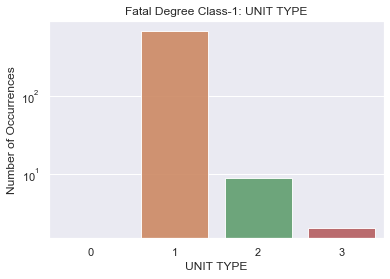

In [50]:
counts = df_fatal_degree_class_1['UNIT_TYPE'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: UNIT TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('UNIT TYPE', fontsize=12)
plt.show()

### Hit and run

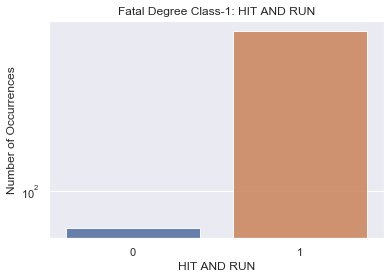

In [51]:
counts = df_fatal_degree_class_1['HIT_AND_RUN'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: HIT AND RUN')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HIT AND RUN', fontsize=12)
plt.show()

### First contact point

[1, 2, 3, 6, 5, 4, 9, 10, 7, 12, 11, 8] [240, 103, 78, 62, 45, 43, 19, 14, 14, 12, 12, 7]


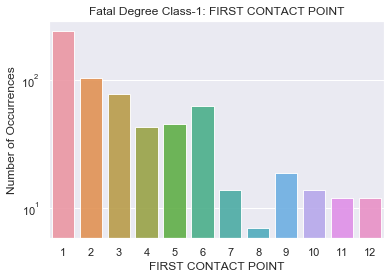

In [52]:
counts = df_fatal_degree_class_1['FIRST_CONTACT_POINT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: FIRST CONTACT POINT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CONTACT POINT', fontsize=12)
plt.show()

### Traffic control device

[1, 2, 4, 6, 3] [449, 207, 4, 0, 0]


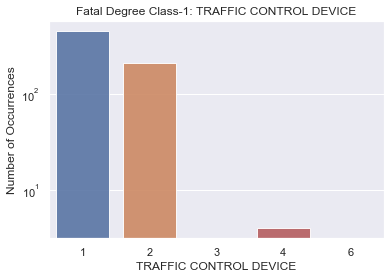

In [53]:
counts = df_fatal_degree_class_1['TRAFFIC_CONTROL_DEVICE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: TRAFFIC CONTROL DEVICE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAFFIC CONTROL DEVICE', fontsize=12)
plt.show()

### Vehicle type

[1, 2, 4, 3, 7, 5, 6, 9, 11, 10, 8] [485, 59, 43, 24, 5, 5, 3, 2, 0, 0, 0]


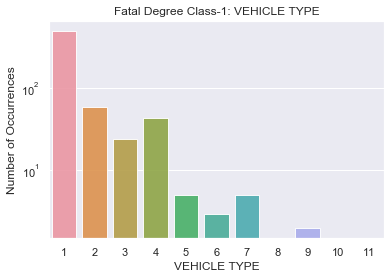

In [54]:
counts = df_fatal_degree_class_1['VEHICLE_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: VEHICLE TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('VEHICLE TYPE', fontsize=12)
plt.show()

### BAC result

[2, 1] [4, 2]


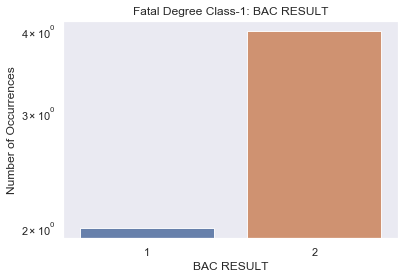

In [55]:
counts = df_fatal_degree_class_1['BAC_RESULT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-1: BAC RESULT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BAC RESULT', fontsize=12)
plt.show()

### correlation

In [56]:
cc1_df = df_fatal_degree_class_1.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc1_df.head())
cc1_df['pairs'] = list(zip(cc1_df.level_0, cc1_df.level_1))
cc1pairs_df = cc1_df.set_index('pairs')
cc1pairs_df = cc1pairs_df.drop(['level_1', 'level_0'], axis=1)
cc1pairs_df.columns = ['cc']
cc1pairs_df = cc1pairs_df.drop_duplicates(keep='first')
cc1pairs_df.head()

               level_0             level_1         0
34           NUM_UNITS        VEHICLE_YEAR  0.000460
20        VEHICLE_YEAR           NUM_UNITS  0.000460
25  POSTED_SPEED_LIMIT                 AGE  0.001440
11                 AGE  POSTED_SPEED_LIMIT  0.001440
49   CRASH_DAY_OF_WEEK                 AGE  0.003673


,cc
pairs,
"(NUM_UNITS, VEHICLE_YEAR)",0.000460
"(POSTED_SPEED_LIMIT, AGE)",0.001440
"(CRASH_DAY_OF_WEEK, AGE)",0.003673
"(VEHICLE_YEAR, AGE)",0.004179
"(CRASH_HOUR, ZIPCODE)",0.004922


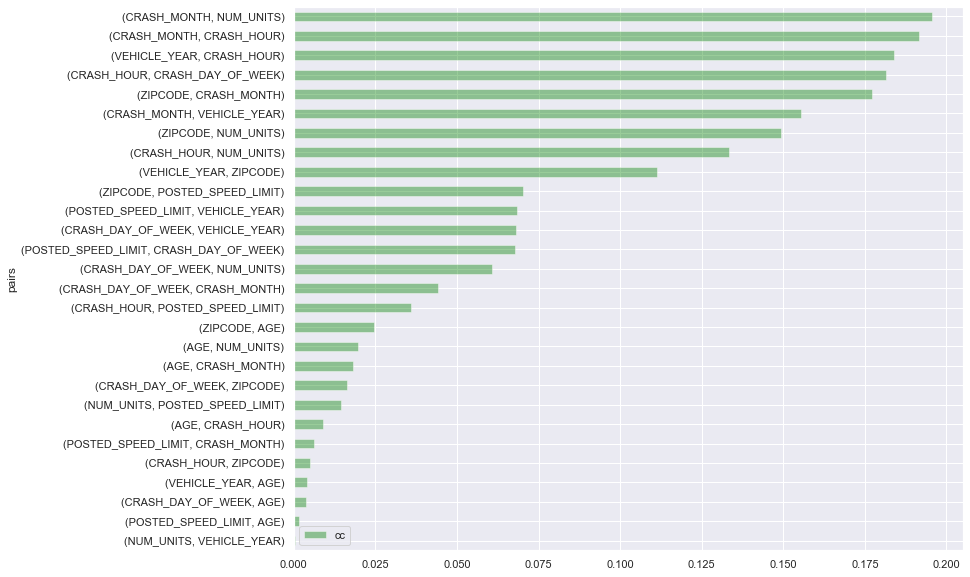

In [57]:
cc1pairs_update_df = cc1pairs_df[cc1pairs_df.cc<1]
cc1pairs_update_df.plot.barh(figsize=(12,10), color='green', alpha=0.4)

## Fatal Degree Class-2

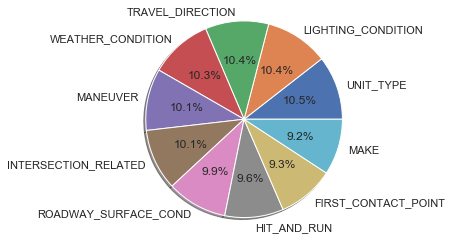

In [58]:
labels = list(top10features_fatal_degree_2.keys())
sizes = list(top10features_fatal_degree_2.values())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

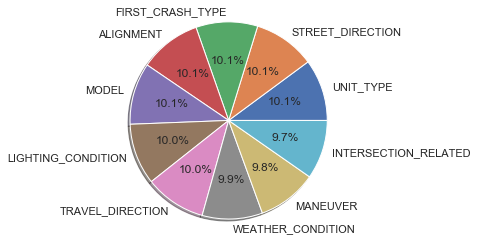

In [59]:
labels = list(top10ALLfeatures_fatal_degree_2.keys())
sizes = list(top10ALLfeatures_fatal_degree_2.values())
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax2.axis('equal')
plt.show()

### Lighting condition

[1, 2, 3, 4, 5] [489, 244, 51, 14, 12]


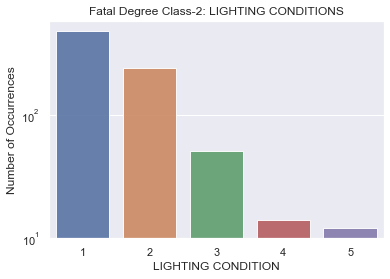

In [60]:
df_fatal_degree_class_2 = dfcovid1[dfcovid1['FATAL_DEGREE']==2]
counts = df_fatal_degree_class_2['LIGHTING_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: LIGHTING CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LIGHTING CONDITION', fontsize=12)
plt.show()

### First crash type

[1, 2, 3, 5, 9, 6, 4, 7, 10, 13, 12, 11, 8] [345, 175, 107, 100, 49, 24, 12, 4, 1, 0, 0, 0, 0]


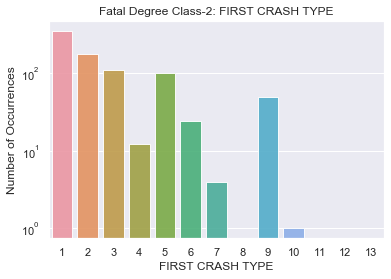

In [61]:
counts = df_fatal_degree_class_2['FIRST_CRASH_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: FIRST CRASH TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CRASH TYPE', fontsize=12)
plt.show()

### Street direction

[1, 2, 3, 4] [341, 287, 136, 53]


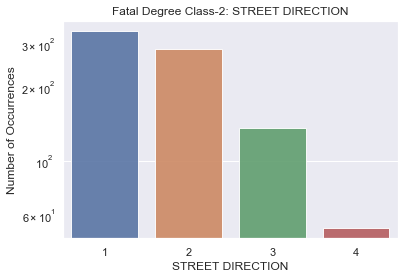

In [62]:
counts = df_fatal_degree_class_2['STREET_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: STREET DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('STREET DIRECTION', fontsize=12)
plt.show()

### Alignment

[1, 2, 3, 4] [808, 6, 2, 1]


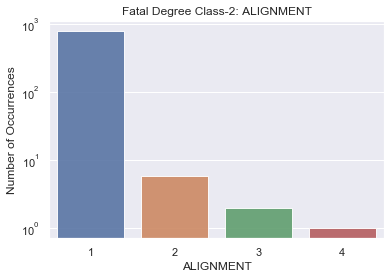

In [63]:
counts = df_fatal_degree_class_2['ALIGNMENT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: ALIGNMENT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ALIGNMENT', fontsize=12)
plt.show()

### Weather condition

[1, 2, 3, 5, 7] [730, 59, 4, 3, 2]


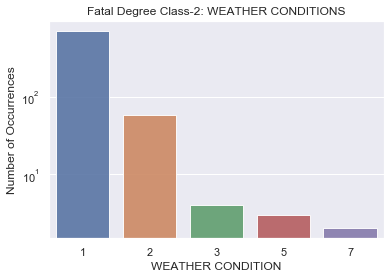

In [64]:
counts = df_fatal_degree_class_2['WEATHER_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: WEATHER CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('WEATHER CONDITION', fontsize=12)
plt.show()

### Roadway surface condition

[1, 2] [670, 101]


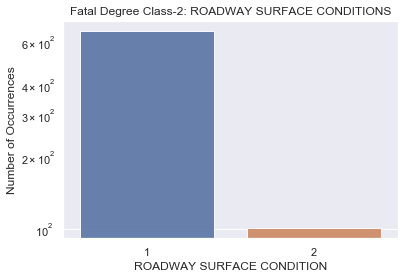

In [65]:
counts = df_fatal_degree_class_2['ROADWAY_SURFACE_COND'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: ROADWAY SURFACE CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ROADWAY SURFACE CONDITION', fontsize=12)
plt.show()

### Intersection-related

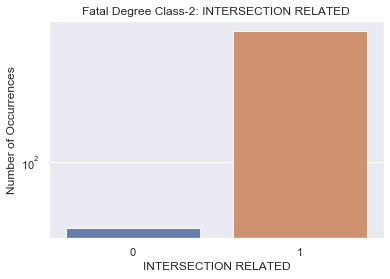

In [66]:
counts = df_fatal_degree_class_2['INTERSECTION_RELATED'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: INTERSECTION RELATED')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('INTERSECTION RELATED', fontsize=12)
plt.show()

### Travel direction

[3, 1, 2, 4, 7, 5, 8, 6] [219, 204, 179, 170, 16, 11, 5, 4]


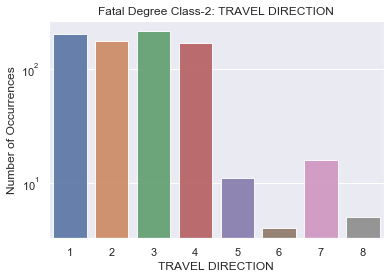

In [67]:
counts = df_fatal_degree_class_2['TRAVEL_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: TRAVEL DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAVEL DIRECTION', fontsize=12)
plt.show()

### Maneuver

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15, 12, 16] [538, 92, 37, 36, 25, 20, 16, 8, 4, 4, 4, 2, 1]


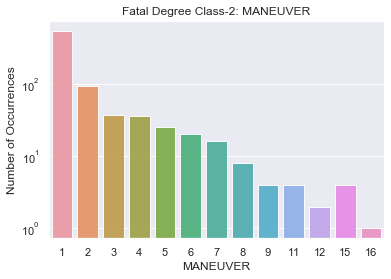

In [68]:
counts = df_fatal_degree_class_2['MANEUVER'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: MANEUVER')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MANEUVER', fontsize=12)
plt.show()

### Unit type

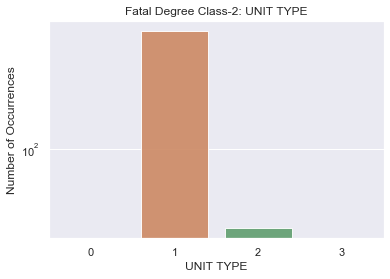

In [69]:
counts = df_fatal_degree_class_2['UNIT_TYPE'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: UNIT TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('UNIT TYPE', fontsize=12)
plt.show()

### Hit and run

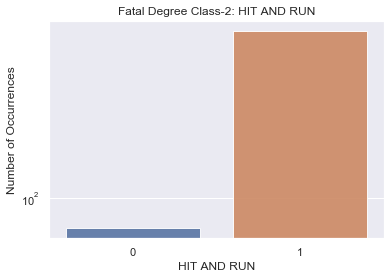

In [70]:
counts = df_fatal_degree_class_2['HIT_AND_RUN'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: HIT AND RUN')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HIT AND RUN', fontsize=12)
plt.show()

###  First contact point

[1, 3, 4, 2, 5, 6, 11, 10, 7, 8, 9, 12] [299, 102, 71, 65, 57, 46, 19, 18, 18, 13, 12, 2]


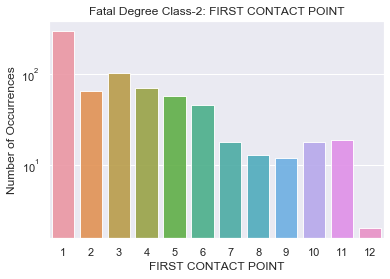

In [71]:
counts = df_fatal_degree_class_2['FIRST_CONTACT_POINT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: FIRST CONTACT POINT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CONTACT POINT', fontsize=12)
plt.show()

### Traffic control device

[1, 2, 3, 6, 4] [483, 211, 6, 4, 2]


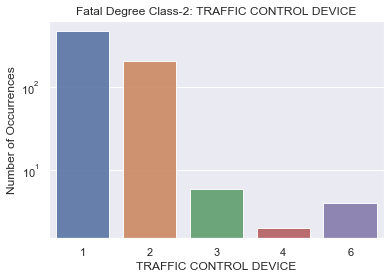

In [72]:
counts = df_fatal_degree_class_2['TRAFFIC_CONTROL_DEVICE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: TRAFFIC CONTROL DEVICE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAFFIC CONTROL DEVICE', fontsize=12)
plt.show()

### Vehicle type

[1, 2, 3, 4, 6, 5, 8, 7, 11, 10, 9] [541, 62, 37, 28, 23, 6, 4, 1, 0, 0, 0]


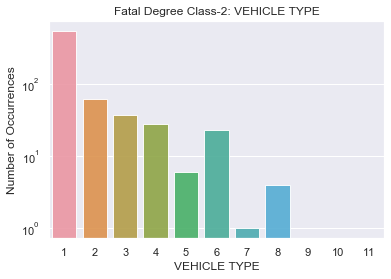

In [73]:
counts = df_fatal_degree_class_2['VEHICLE_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: VEHICLE TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('VEHICLE TYPE', fontsize=12)
plt.show()

### BAC result

[2, 1] [13, 2]


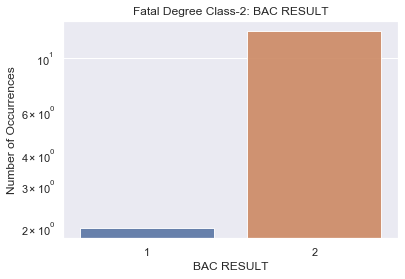

In [74]:
counts = df_fatal_degree_class_2['BAC_RESULT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-2: BAC RESULT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BAC RESULT', fontsize=12)
plt.show()

### correlation

In [75]:
cc2_df = df_fatal_degree_class_2.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc2_df.head())
cc2_df['pairs'] = list(zip(cc2_df.level_0, cc2_df.level_1))
cc2pairs_df = cc2_df.set_index('pairs')
cc2pairs_df = cc2pairs_df.drop(['level_1', 'level_0'], axis=1)
cc2pairs_df.columns = ['cc']
cc2pairs_df = cc2pairs_df.drop_duplicates(keep='first')
cc2pairs_df.head()

       level_0      level_1         0
12         AGE    NUM_UNITS  0.001097
33   NUM_UNITS          AGE  0.001097
8          AGE      ZIPCODE  0.002203
1      ZIPCODE          AGE  0.002203
47  CRASH_HOUR  CRASH_MONTH  0.003942


,cc
pairs,
"(AGE, NUM_UNITS)",0.001097
"(AGE, ZIPCODE)",0.002203
"(CRASH_HOUR, CRASH_MONTH)",0.003942
"(CRASH_HOUR, ZIPCODE)",0.004469
"(CRASH_HOUR, POSTED_SPEED_LIMIT)",0.006536


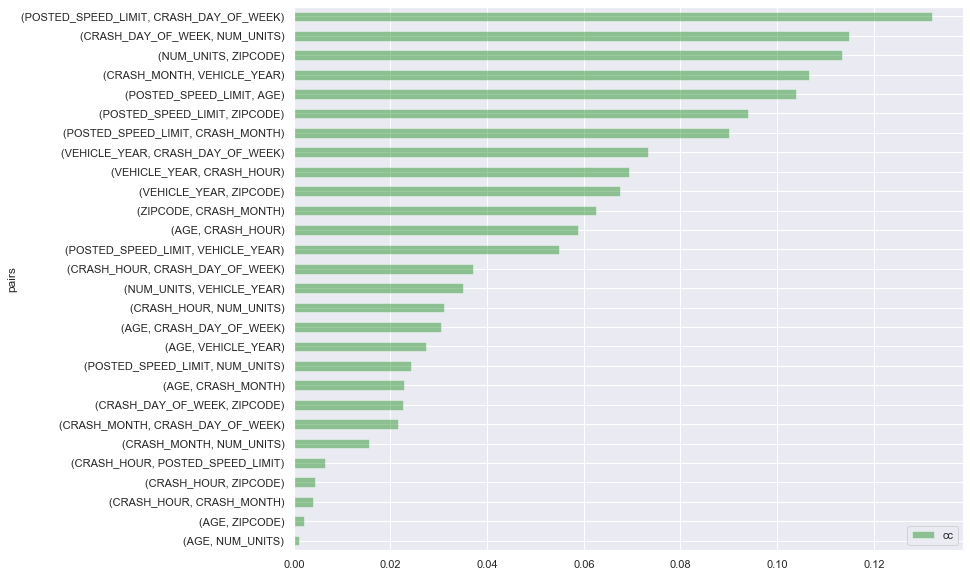

In [76]:
cc2pairs_update_df = cc2pairs_df[cc2pairs_df.cc<1]
cc2pairs_update_df.plot.barh(figsize=(12,10), color='green', alpha=0.4)

## Fatal Degree Class-3

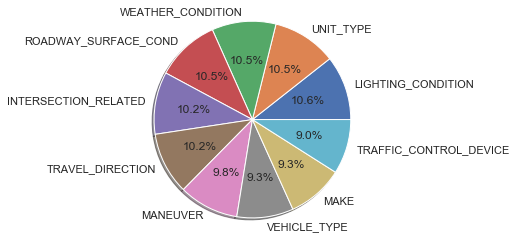

In [77]:
labels = list(top10features_fatal_degree_3.keys())
sizes = list(top10features_fatal_degree_3.values())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

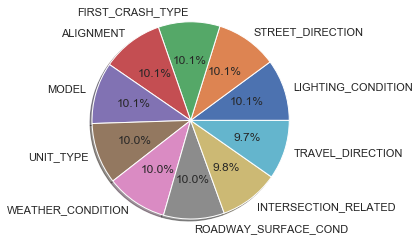

In [78]:
labels = list(top10ALLfeatures_fatal_degree_3.keys())
sizes = list(top10ALLfeatures_fatal_degree_3.values())
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax2.axis('equal')
plt.show()

###  Lighting condition

[1, 2, 5, 3, 4] [307, 179, 20, 11, 7]


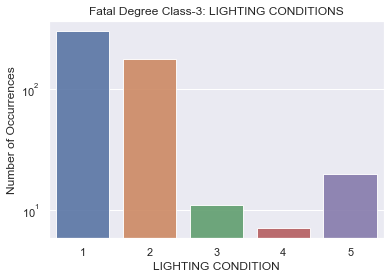

In [79]:
df_fatal_degree_class_3 = dfcovid1[dfcovid1['FATAL_DEGREE']==3]
counts = df_fatal_degree_class_3['LIGHTING_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: LIGHTING CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LIGHTING CONDITION', fontsize=12)
plt.show()

### First crash type

[1, 2, 5, 4, 3, 6, 9, 8, 13, 10, 12, 11, 7] [225, 86, 76, 49, 49, 20, 12, 3, 2, 2, 0, 0, 0]


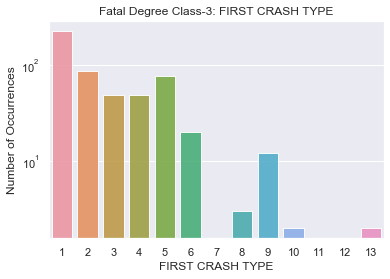

In [80]:
counts = df_fatal_degree_class_3['FIRST_CRASH_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: FIRST CRASH TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CRASH TYPE', fontsize=12)
plt.show()

### Street direction

[1, 2, 3, 4] [232, 178, 84, 30]


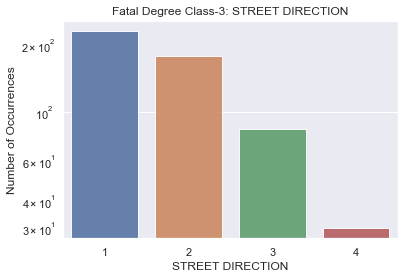

In [81]:
counts = df_fatal_degree_class_3['STREET_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: STREET DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('STREET DIRECTION', fontsize=12)
plt.show()

### Alignment

[1, 2, 4, 3] [513, 11, 0, 0]


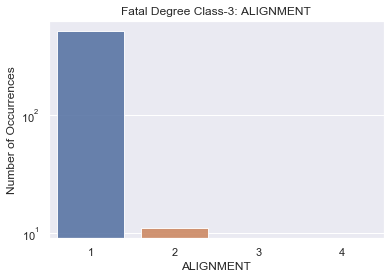

In [82]:
counts = df_fatal_degree_class_3['ALIGNMENT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: ALIGNMENT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ALIGNMENT', fontsize=12)
plt.show()

### Weather condition

[1, 2, 3] [473, 37, 10]


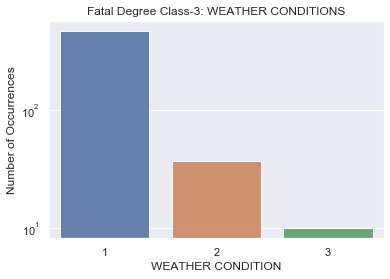

In [83]:
counts = df_fatal_degree_class_3['WEATHER_CONDITION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: WEATHER CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('WEATHER CONDITION', fontsize=12)
plt.show()

### Roadway surface condition

[1, 2] [467, 50]


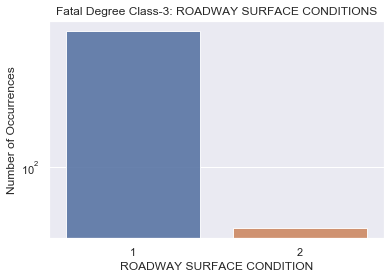

In [84]:
counts = df_fatal_degree_class_3['ROADWAY_SURFACE_COND'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: ROADWAY SURFACE CONDITIONS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ROADWAY SURFACE CONDITION', fontsize=12)
plt.show()

### Intersection-related

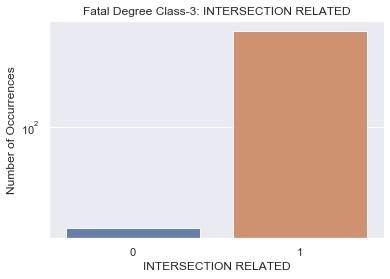

In [85]:
counts = df_fatal_degree_class_3['INTERSECTION_RELATED'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: INTERSECTION RELATED')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('INTERSECTION RELATED', fontsize=12)
plt.show()

###  Travel direction

[4, 1, 3, 2, 6, 8, 5] [158, 127, 114, 78, 14, 8, 5]


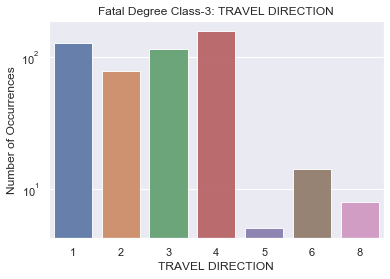

In [86]:
counts = df_fatal_degree_class_3['TRAVEL_DIRECTION'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: TRAVEL DIRECTION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAVEL DIRECTION', fontsize=12)
plt.show()

### Maneuver

[1, 2, 3, 5, 4, 6, 11, 13, 9] [364, 43, 27, 23, 12, 10, 3, 2, 2]


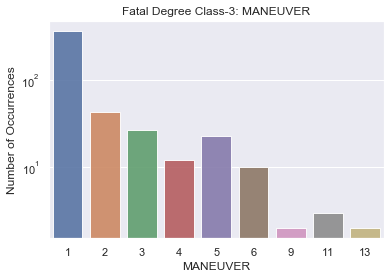

In [87]:
counts = df_fatal_degree_class_3['MANEUVER'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if idx >= 0 and counts[idx] > 0:
        indices.append(idx)
        values.append(counts[idx])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: MANEUVER')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MANEUVER', fontsize=12)
plt.show()

### Unit type

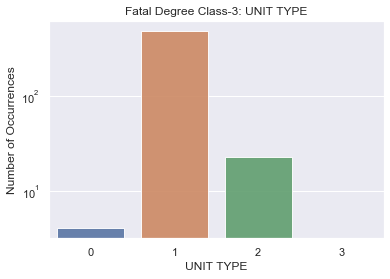

In [88]:
counts = df_fatal_degree_class_3['UNIT_TYPE'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: UNIT TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('UNIT TYPE', fontsize=12)
plt.show()

### Hit and run

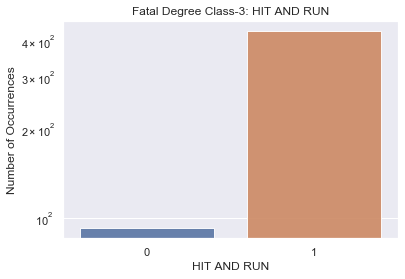

In [89]:
counts = df_fatal_degree_class_3['HIT_AND_RUN'].value_counts()
sns.set(style="darkgrid")
g = sns.barplot(counts.index, counts.values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: HIT AND RUN')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HIT AND RUN', fontsize=12)
plt.show()

###  First contact point

[1, 3, 2, 5, 4, 6, 12, 9, 11, 10, 8, 7] [165, 67, 44, 43, 36, 21, 13, 13, 12, 10, 7, 6]


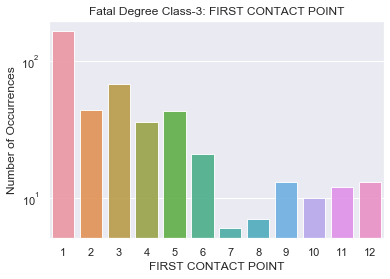

In [90]:
counts = df_fatal_degree_class_3['FIRST_CONTACT_POINT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: FIRST CONTACT POINT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FIRST CONTACT POINT', fontsize=12)
plt.show()

### Traffic control device

[1, 2, 6, 4, 3] [345, 99, 0, 0, 0]


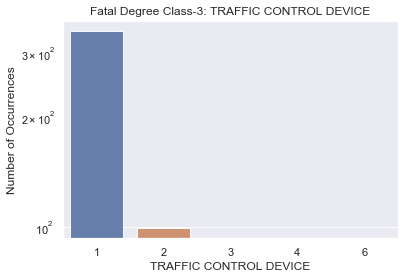

In [91]:
counts = df_fatal_degree_class_3['TRAFFIC_CONTROL_DEVICE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: TRAFFIC CONTROL DEVICE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TRAFFIC CONTROL DEVICE', fontsize=12)
plt.show()

### Vehicle type

[1, 2, 3, 5, 6, 4, 11, 10, 9, 8, 7] [338, 79, 16, 11, 8, 4, 3, 0, 0, 0, 0]


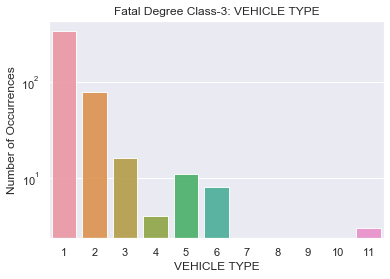

In [92]:
counts = df_fatal_degree_class_3['VEHICLE_TYPE'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: VEHICLE TYPE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('VEHICLE TYPE', fontsize=12)
plt.show()

### BAC result

[2, 1] [10, 2]


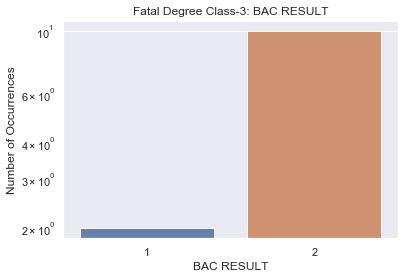

In [93]:
counts = df_fatal_degree_class_3['BAC_RESULT'].value_counts()
sns.set(style="darkgrid")
indices = [] 
values = []
for idx in list(counts.index):
    if int(idx) > 0:
        indices.append(int(idx))
        values.append(counts[int(idx)])
    else:
        continue
print(indices, values)
g = sns.barplot(indices, values, alpha=0.9)
g.set_yscale('log')
plt.title('Fatal Degree Class-3: BAC RESULT')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BAC RESULT', fontsize=12)
plt.show()

### correlation

In [94]:
cc3_df = df_fatal_degree_class_3.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc3_df.head())
cc3_df['pairs'] = list(zip(cc3_df.level_0, cc3_df.level_1))
cc3pairs_df = cc3_df.set_index('pairs')
cc3pairs_df = cc3pairs_df.drop(['level_1', 'level_0'], axis=1)
cc3pairs_df.columns = ['cc']
cc3pairs_df = cc3pairs_df.drop_duplicates(keep='first')
cc3pairs_df.head()

               level_0             level_1         0
40          CRASH_HOUR             ZIPCODE  0.002707
5              ZIPCODE          CRASH_HOUR  0.002707
43          CRASH_HOUR  POSTED_SPEED_LIMIT  0.011700
29  POSTED_SPEED_LIMIT          CRASH_HOUR  0.011700
1              ZIPCODE                 AGE  0.011836


,cc
pairs,
"(CRASH_HOUR, ZIPCODE)",0.002707
"(CRASH_HOUR, POSTED_SPEED_LIMIT)",0.011700
"(ZIPCODE, AGE)",0.011836
"(CRASH_HOUR, AGE)",0.013033
"(POSTED_SPEED_LIMIT, CRASH_MONTH)",0.015757


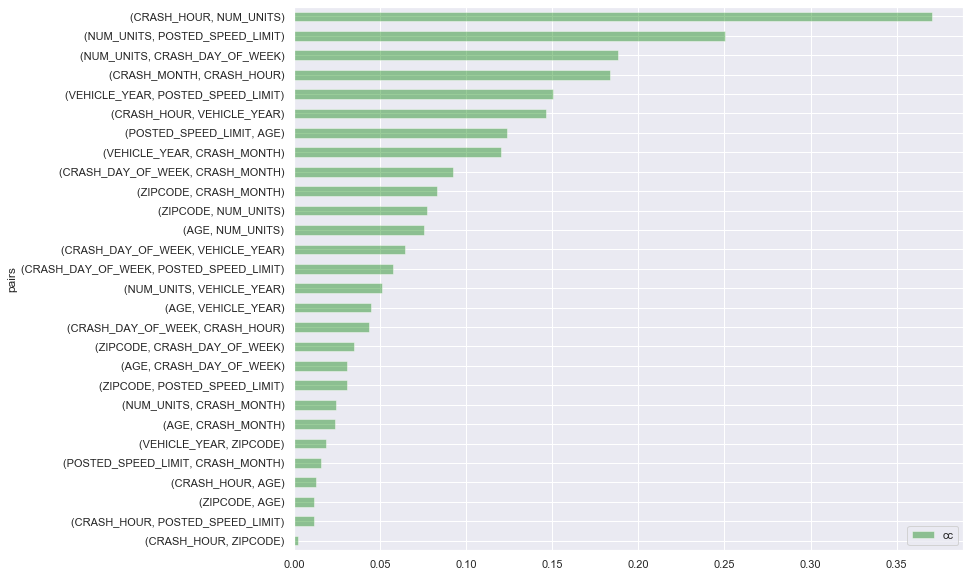

In [95]:
cc3pairs_update_df = cc3pairs_df[cc3pairs_df.cc<1]
cc3pairs_update_df.plot.barh(figsize=(12,10), color='green', alpha=0.4)

# EDA Q3: in Q1, what're time dependent? what're not? others involved?

## Average Fatal Degree w.r.t. 24 Crash Hours for Male and Female, respectively

In [96]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='SEX', 
        index='CRASH_HOUR', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('SEX {}'.format, axis='columns')
    .style.format('{:.3f}')
)

,SEX 0,SEX 1
CRASH_HOUR,,
0,1.231,1.333
1,1.465,1.700
2,1.421,1.286
3,1.448,1.562
4,0.917,1.846
5,1.667,1.143
6,0.667,1.364
7,1.929,1.529
8,1.216,1.206


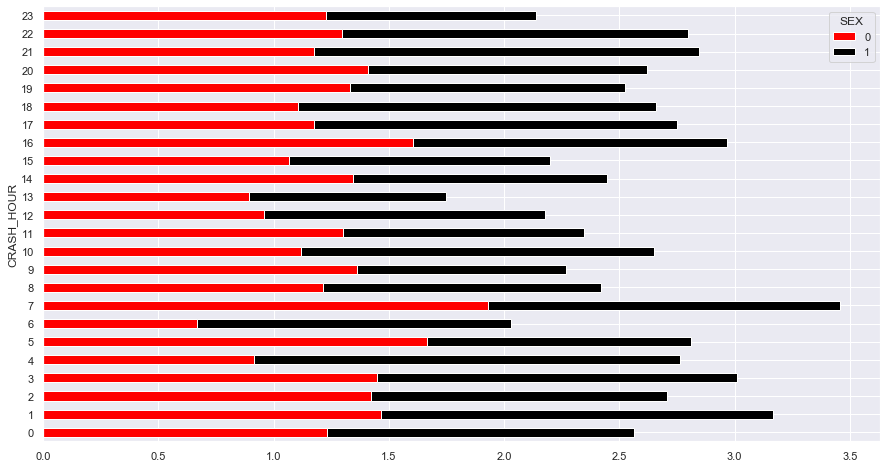

In [97]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2EDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='SEX', 
        index='CRASH_HOUR', 
        aggfunc='mean')
    .plot(kind='barh', figsize=(15,8), stacked=True, colormap='flag')
)

### Average Crash Hour w.r.t. Fatal Degree for Male and Female, respectively

(12.05, 16.05)

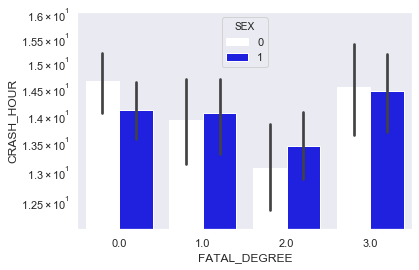

In [98]:
g = sns.barplot(x="FATAL_DEGREE", y="CRASH_HOUR", hue="SEX",
                data=dfcovid1, palette="flag", log=True)
g.set_ylim(12.05, 16.05)

## Average Fatal Degree w.r.t. 7 Crash Days for Male and Female, respectively

In [99]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='SEX', 
        index='CRASH_DAY_OF_WEEK', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('SEX {}'.format, axis='columns')
    .style.format('{:.3f}')
)

,SEX 0,SEX 1
CRASH_DAY_OF_WEEK,,
1,1.418,1.188
2,1.273,1.547
3,1.142,1.284
4,1.126,1.469
5,1.298,1.489
6,1.257,1.115
7,1.260,1.296


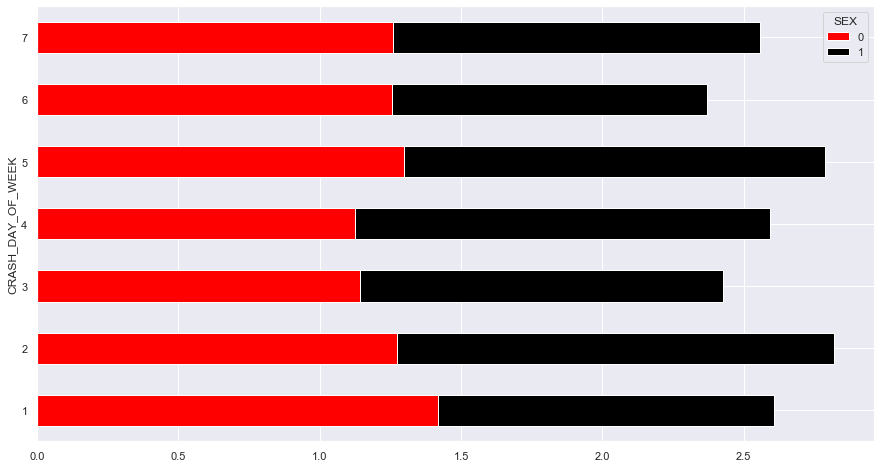

In [100]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2EDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='SEX', 
        index='CRASH_DAY_OF_WEEK', 
        aggfunc='mean')
    .plot(kind='barh', figsize=(15,8), stacked=True, colormap='flag')
)

### Average Crash Day w.r.t. Fatal Degree for Male and Female, respectively

(3.05, 4.55)

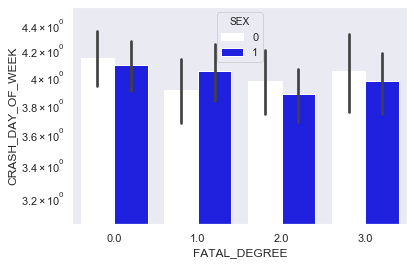

In [101]:
g = sns.barplot(x="FATAL_DEGREE", y="CRASH_DAY_OF_WEEK", hue="SEX",
                data=dfcovid1, palette="flag", log=True)
g.set_ylim(3.05, 4.55)

## Average Fatal Degree w.r.t. 5 Crash Months for Male and Female, respectively

In [102]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='SEX', 
        index='CRASH_MONTH', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('SEX {}'.format, axis='columns')
    .style.format('{:.3f}')
)

,SEX 0,SEX 1
CRASH_MONTH,,
4,1.529,1.253
5,1.387,1.352
6,1.128,1.441
7,1.195,1.175
8,1.196,1.477


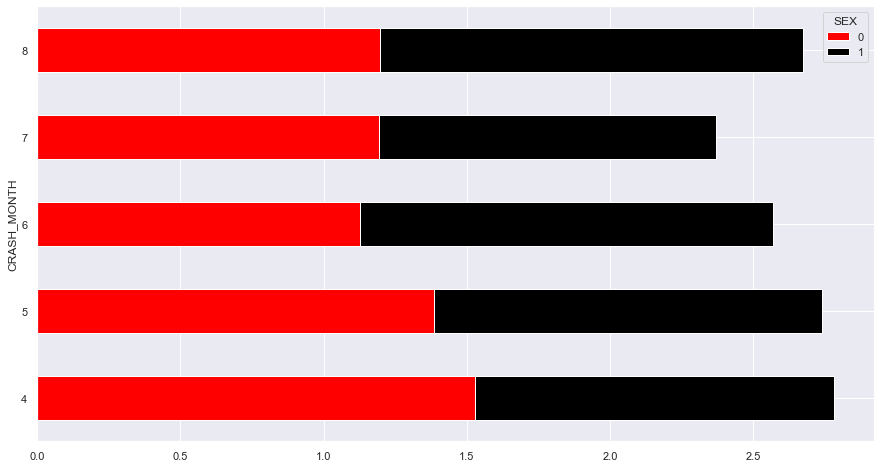

In [103]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2EDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='SEX', 
        index='CRASH_MONTH', 
        aggfunc='mean')
    .plot(kind='barh', figsize=(15,8), stacked=True, colormap='flag')
)

### Average Crash Month w.r.t. Fatal Degree for Male and Female, respectively

(5.05, 6.55)

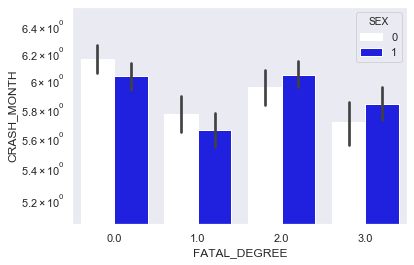

In [104]:
g = sns.barplot(x="FATAL_DEGREE", y="CRASH_MONTH", hue="SEX",
                data=dfcovid1, palette="flag", log=True)
g.set_ylim(5.05, 6.55)

## Average Fatal Degree w.r.t. Unit Number for Male and Female, respectively

In [105]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='SEX', 
        index='NUM_UNITS', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('SEX {}'.format, axis='columns')
    .style.format('{:.3f}')
)

,SEX 0,SEX 1
NUM_UNITS,,
1,1.667,2.000
2,1.232,1.276
3,1.276,1.420
4,1.145,1.184
5,2.500,3.000
6,1.500,1.667


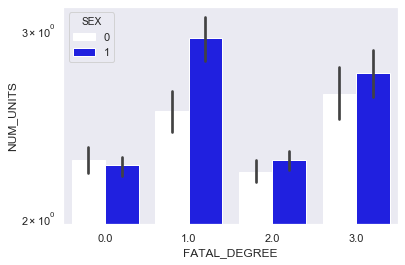

In [106]:
g = sns.barplot(x="FATAL_DEGREE", y="NUM_UNITS", hue="SEX",
                data=dfcovid1, palette="flag", log=True)
#g.set_ylim(5.05, 6.55)

## Average Age w.r.t. Fatal Degree for Male and Female, respectively

In [107]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='AGE', 
        columns='FATAL_DEGREE', 
        index='SEX', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('FATAL DEGREE {}'.format, axis='columns')
    .style.format('{:.3f}')
)

,FATAL DEGREE 0.0,FATAL DEGREE 1.0,FATAL DEGREE 2.0,FATAL DEGREE 3.0
SEX,,,,
0,37.021,34.886,37.409,36.503
1,38.898,37.280,36.661,38.786


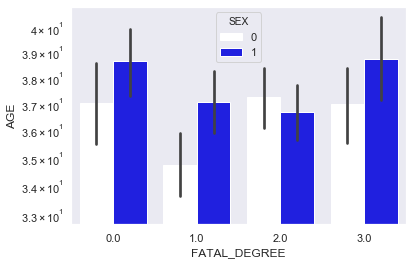

In [108]:
g = sns.barplot(x="FATAL_DEGREE", y="AGE", hue="SEX",
                data=dfcovid1, palette="flag", log=True)
#g.set_ylim(5.05, 6.55)

## Average Age w.r.t. Fatal Degree for 24 Crash Hours, respectively

In [109]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='AGE', 
        columns='FATAL_DEGREE', 
        index='CRASH_HOUR', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('FATAL DEGREE {}'.format, axis='columns')
    .style.format('{:.3f}')
)

,FATAL DEGREE 0.0,FATAL DEGREE 1.0,FATAL DEGREE 2.0,FATAL DEGREE 3.0
CRASH_HOUR,,,,
0,31.079,36.059,37.548,33.158
1,37.700,30.571,33.457,38.350
2,37.750,32.250,35.450,34.556
3,37.833,35.842,40.741,33.231
4,46.000,36.545,26.300,47.500
5,39.200,38.500,41.800,nan
6,41.000,32.000,40.967,46.750
7,42.588,28.000,39.020,38.667
8,39.579,44.636,34.804,34.000


## Average Vehicle Year w.r.t. Fatal Degree for Male and Female, respectively

In [110]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='VEHICLE_YEAR', 
        columns='FATAL_DEGREE', 
        index='SEX', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('FATAL DEGREE {}'.format, axis='columns')
    .style.format('{:.0f}')
)

,FATAL DEGREE 0.0,FATAL DEGREE 1.0,FATAL DEGREE 2.0,FATAL DEGREE 3.0
SEX,,,,
0,2012,2010,2011,2011
1,2010,2010,2011,2010


## Average Vehicle Year w.r.t. Fatal Degree for 24 Crash Hours, respectively

In [111]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='VEHICLE_YEAR', 
        columns='FATAL_DEGREE', 
        index='CRASH_HOUR', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('FATAL DEGREE {}'.format, axis='columns')
    .style.format('{:.0f}')
)

,FATAL DEGREE 0.0,FATAL DEGREE 1.0,FATAL DEGREE 2.0,FATAL DEGREE 3.0
CRASH_HOUR,,,,
0,2010,2011,2013,2010
1,2008,2013,2009,2007
2,2010,2014,2011,2008
3,2010,2010,2007,2008
4,2014,2013,2010,2010
5,2009,2009,2011,nan
6,2009,2008,2011,2010
7,2007,2014,2011,2012
8,2013,2009,2010,2014


(1950.0, 2050.0)

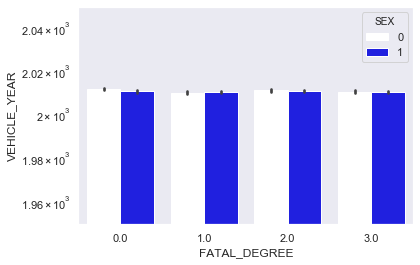

In [112]:
g = sns.barplot(x="FATAL_DEGREE", y="VEHICLE_YEAR", hue="SEX",
                data=dfcovid1, palette="flag", log=True)
g.set_ylim(1950., 2050.)

## Average Speed Limit w.r.t. Fatal Degree for Male and Female, respectively

In [113]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='POSTED_SPEED_LIMIT', 
        columns='FATAL_DEGREE', 
        index='SEX', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('FATAL DEGREE {}'.format, axis='columns')
    .style.format('{:.0f}')
)

,FATAL DEGREE 0.0,FATAL DEGREE 1.0,FATAL DEGREE 2.0,FATAL DEGREE 3.0
SEX,,,,
0,30,30,30,30
1,30,30,31,29


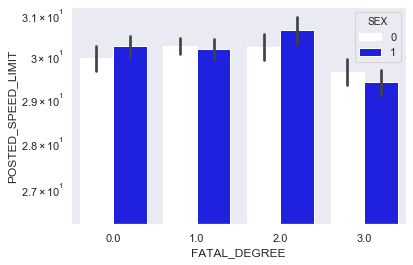

In [114]:
g = sns.barplot(x="FATAL_DEGREE", y="POSTED_SPEED_LIMIT", hue="SEX",
                data=dfcovid1, palette="flag", log=True)
#g.set_ylim(5.05, 6.55)

## Average Speed Limit w.r.t. Fatal Degree for 24 Crash Hours, respectively

In [115]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv')
    .query('STATE == "IL"')
    .pivot_table(
        values='POSTED_SPEED_LIMIT', 
        columns='FATAL_DEGREE', 
        index='CRASH_HOUR', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('FATAL DEGREE {}'.format, axis='columns')
    .style.format('{:.0f}')
)

,FATAL DEGREE 0.0,FATAL DEGREE 1.0,FATAL DEGREE 2.0,FATAL DEGREE 3.0
CRASH_HOUR,,,,
0,30,30,31,31
1,31,30,30,30
2,31,33,30,26
3,30,30,30,30
4,32,31,30,30
5,30,30,27,nan
6,30,30,32,32
7,30,30,30,29
8,30,30,34,30


## Speed Limit, Age, Vehicle Year in Raw Data

Text(0.5, 0, 'POSTED SPEED LIMIT')

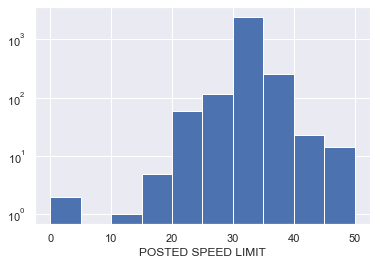

In [116]:
fig, axs = plt.subplots(figsize=(6, 4));
dfcovid1['POSTED_SPEED_LIMIT'].hist(ax=axs, log=True)
axs.set_xlabel('POSTED SPEED LIMIT')

Text(0.5, 0, 'AGE')

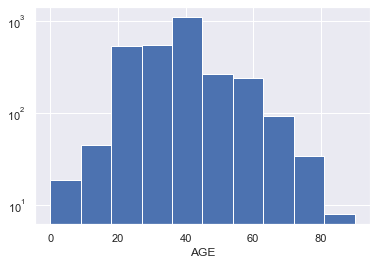

In [117]:
fig, axs = plt.subplots(figsize=(6, 4));
dfcovid1['AGE'].hist(ax=axs, log=True)
axs.set_xlabel('AGE')

Text(0.5, 0, 'VEHICLE YEAR')

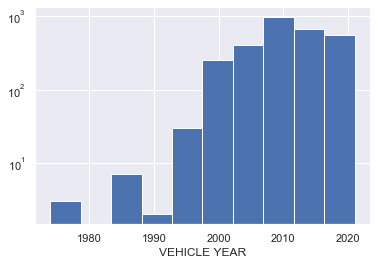

In [118]:
fig, axs = plt.subplots(figsize=(6, 4));
dfcovid1['VEHICLE_YEAR'].hist(ax=axs, log=True)
axs.set_xlabel('VEHICLE YEAR')

In [119]:
dfcovid1.dtypes

CITY                        object
STATE                       object
ZIPCODE                      int64
AGE                        float64
EJECTION                  category
DRIVER_ACTION             category
BAC_RESULT                category
UNIT_TYPE                 category
MAKE                      category
MODEL                     category
VEHICLE_YEAR               float64
VEHICLE_TYPE              category
TRAVEL_DIRECTION          category
MANEUVER                  category
FIRST_CONTACT_POINT       category
POSTED_SPEED_LIMIT           int64
TRAFFIC_CONTROL_DEVICE    category
DEVICE_CONDITION          category
WEATHER_CONDITION         category
LIGHTING_CONDITION        category
FIRST_CRASH_TYPE          category
TRAFFICWAY_TYPE           category
ALIGNMENT                 category
ROADWAY_SURFACE_COND      category
ROAD_DEFECT               category
STREET_DIRECTION          category
NUM_UNITS                    int64
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK   

In [120]:
dfcovid2 = dfcovid1.copy()

In [121]:
dfcovid2['DAMAGE_COST'] = dfcovid2['DAMAGE_500_OR_LESS'].astype('int64')*1 + dfcovid2['DAMAGE_501_1500'].astype('int64')*2 + dfcovid2['DAMAGE_OVER_1500'].astype('int64')*3

In [122]:
dfcovid2['FATAL_COND'] = dfcovid2['FATAL_INBOTH'].astype('int64')*4 + dfcovid2['FATAL_CARPPL'].astype('int64')*3 + dfcovid2['FATAL_INAUTO'].astype('int64')*2 + dfcovid2['FATAL_OTHPPL'].astype('int64')*1

In [123]:
dfcovid2.drop(['DAMAGE_500_OR_LESS','DAMAGE_501_1500','DAMAGE_OVER_1500','FATAL_INBOTH','FATAL_CARPPL','FATAL_INAUTO',
               'FATAL_OTHPPL'], axis=1, inplace=True)
dfcovid2['DAMAGE_COST'] = dfcovid2['DAMAGE_COST'].astype('category')
dfcovid2['FATAL_COND'] = dfcovid2['FATAL_COND'].astype('category')
dfcovid2.dtypes

CITY                        object
STATE                       object
ZIPCODE                      int64
AGE                        float64
EJECTION                  category
DRIVER_ACTION             category
BAC_RESULT                category
UNIT_TYPE                 category
MAKE                      category
MODEL                     category
VEHICLE_YEAR               float64
VEHICLE_TYPE              category
TRAVEL_DIRECTION          category
MANEUVER                  category
FIRST_CONTACT_POINT       category
POSTED_SPEED_LIMIT           int64
TRAFFIC_CONTROL_DEVICE    category
DEVICE_CONDITION          category
WEATHER_CONDITION         category
LIGHTING_CONDITION        category
FIRST_CRASH_TYPE          category
TRAFFICWAY_TYPE           category
ALIGNMENT                 category
ROADWAY_SURFACE_COND      category
ROAD_DEFECT               category
STREET_DIRECTION          category
NUM_UNITS                    int64
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK   

In [124]:
dfcovid2.to_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2EDA.csv')

Text(0.5, 0, 'DAMAGE COST')

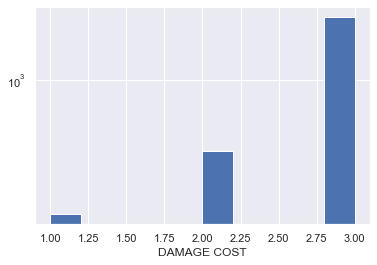

In [125]:
fig, axs = plt.subplots(figsize=(6, 4));
dfcovid2['DAMAGE_COST'].hist(ax=axs, log=True)
axs.set_xlabel('DAMAGE COST')

Text(0.5, 0, 'FATAL COND')

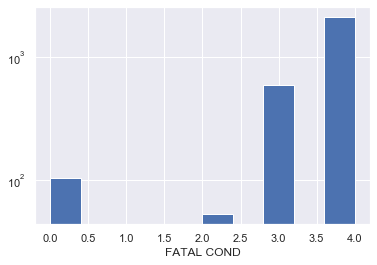

In [126]:
fig, axs = plt.subplots(figsize=(6, 4));
dfcovid2['FATAL_COND'].hist(ax=axs, log=True)
axs.set_xlabel('FATAL COND')

## Average Hour w.r.t. Damage Cost over a range of Fatal Degree

(6.05, 30.05)

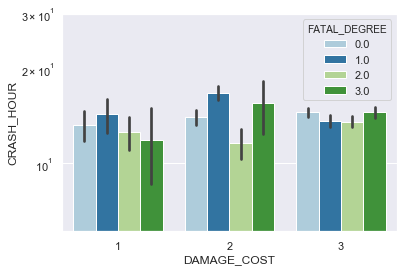

In [127]:
g = sns.barplot(x="DAMAGE_COST", y="CRASH_HOUR", hue="FATAL_DEGREE",
                data=dfcovid2, palette="Paired", log=True)
g.set_ylim(6.05, 30.05)

## Average Hour w.r.t. Damage Cost over a variety of Fatal Scenario

(6.05, 30.05)

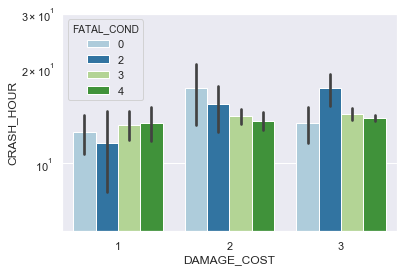

In [128]:
g = sns.barplot(x="DAMAGE_COST", y="CRASH_HOUR", hue="FATAL_COND",
                data=dfcovid2, palette="Paired", 
                log=True)
g.set_ylim(6.05, 30.05)

## Average Crash Unit w.r.t. Damage Cost over a range of Fatal Degree

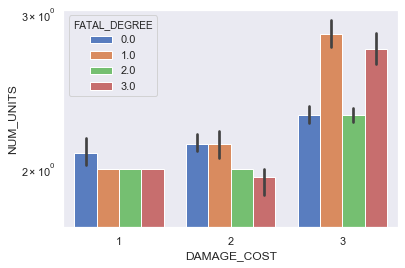

In [129]:
g = sns.barplot(x="DAMAGE_COST", y="NUM_UNITS", hue="FATAL_DEGREE",
                data=dfcovid2, palette="muted", log=True)

## Average Crash Hour w.r.t. Damage Cost over a variety of Fatal Scenario

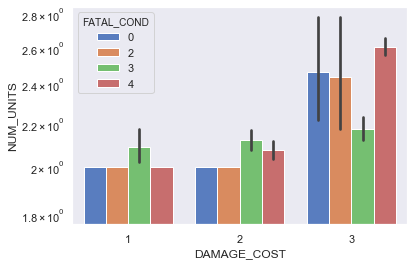

In [130]:
g = sns.barplot(x="DAMAGE_COST", y="NUM_UNITS", hue="FATAL_COND",
                data=dfcovid2, palette="muted", 
                log=True)

## Average Crash Day w.r.t. Damage Cost over a range of Fatal Degree

(3.05, 6.15)

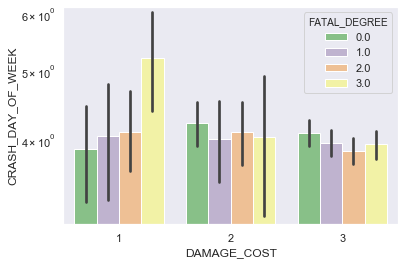

In [131]:
g = sns.barplot(x="DAMAGE_COST", y="CRASH_DAY_OF_WEEK", hue="FATAL_DEGREE",
                data=dfcovid2, palette="Accent", log=True)
g.set_ylim(3.05, 6.15)

## Average Crash Day w.r.t. Damage Cost over a variety of Fatal Scenario

(3.05, 6.55)

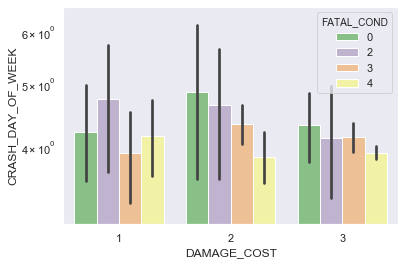

In [132]:
g = sns.barplot(x="DAMAGE_COST", y="CRASH_DAY_OF_WEEK", hue="FATAL_COND",
                data=dfcovid2, palette="Accent", log=True)
g.set_ylim(3.05, 6.55)

## Average Crash Month w.r.t. Damage Cost over a range of Fatal Degree

(4.05, 6.85)

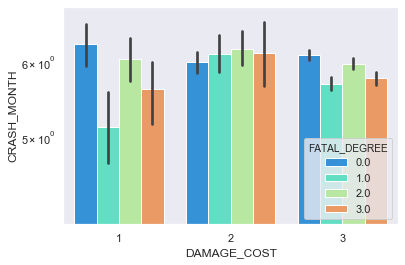

In [133]:
g = sns.barplot(x="DAMAGE_COST", y="CRASH_MONTH", hue="FATAL_DEGREE",
                data=dfcovid2, palette="rainbow", log=True)
g.set_ylim(4.05, 6.85)

## Average Crash Month w.r.t. Damage Cost over a variety of Fatal Scenario

(4.05, 7.25)

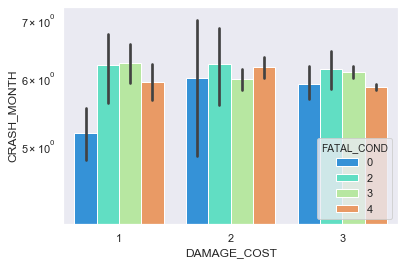

In [134]:
g = sns.barplot(x="DAMAGE_COST", y="CRASH_MONTH", hue="FATAL_COND",
                data=dfcovid2, palette="rainbow", log=True)
g.set_ylim(4.05, 7.25)

## Average Fatal Degree w.r.t. Vehicle Make over a variety of Fatal Scenario


**VEHICLE MAKE**

{'CHEVROLET': 1, 'FORD': 2, 'TOYOTA': 3, 'NISSAN': 4, 'HONDA': 5, 'DODGE': 6, 'JEEP': 7, 'HYUNDAI': 8, 'KIA': 9, 

 'CHRYSLER': 10, 'BUICK': 11, 'VOLKSWAGEN': 12, 'PONTIAC': 13, 'GENERAL_MOTORS_CORPORATION_GMC': 14, 'CADILLAC': 15, 
 
 'LEXUS': 16, 'MAZDA': 17, 'BMW': 18, 'LINCOLN': 19, 'INFINITI': 20, 'MERCEDES_BENZ': 21, 'MITSUBISHI': 22, 'ACURA': 23,
 
 'AUDI': 24, 'SUBARU': 25, 'VOLVO': 26, 'MERCURY': 27, 'NEW_FLYER': 28, 'JAGUAR': 29, 'SATURN': 30, 'HARLEY_DAVIDSON': 31,
 
 'SUZUKI': 32, 'LAND_ROVER': 33, 'PORSCHE': 34, 'TESLA': 35, 'SCION': 36, 'ISUZU': 37, 'FREIGHTLINER_CORPORATION': 38, 
 
 'MINI': 39, 'OLDSMOBILE': 40, 'RANGE_ROVER_OF_NORTH_AMERICA': 41, 'KENWORTH_MOTOR_TRUCK_COMPANY': 42, 'HUMMER': 43,
 
 'BLUEBIRD_INTERNATIONAL': 44, 'YAMAHA': 45, 'GEO': 46, 'MACK_TRUCKS_INC': 47, 'HOMEMADE_MOTORCYCLE_MOPEDETC': 48,
 
 'INTERNATIONAL_HARVESTER': 49, 'NAVISTAR': 50, 'PICK_UP_MANUFACTURING': 51, 'PLYMOUTH': 52,
 
 'PREVOST_CAR_BUS_SAINTE_CLAIRE_QUEBEC': 53, 'SAAB': 54, 'TRANSIT': 55, 'TRIUMPH': 56, 'AMERICAN_MOTORS_CORPORATION_AMC': 57,
 
 'UTILIMASTER_DIVISION_OF_HOLIDAY_RAMBLER_CORPORATION': 58, 'MACK_TRAILER_MANUFACTURING_COMPANY_INC_DETRIOT_MI': 59,
 
 'XYZ_TRAILER': 60, 'SPARTAN_MOTORS_INC_CHARLOTTE_MI': 61}

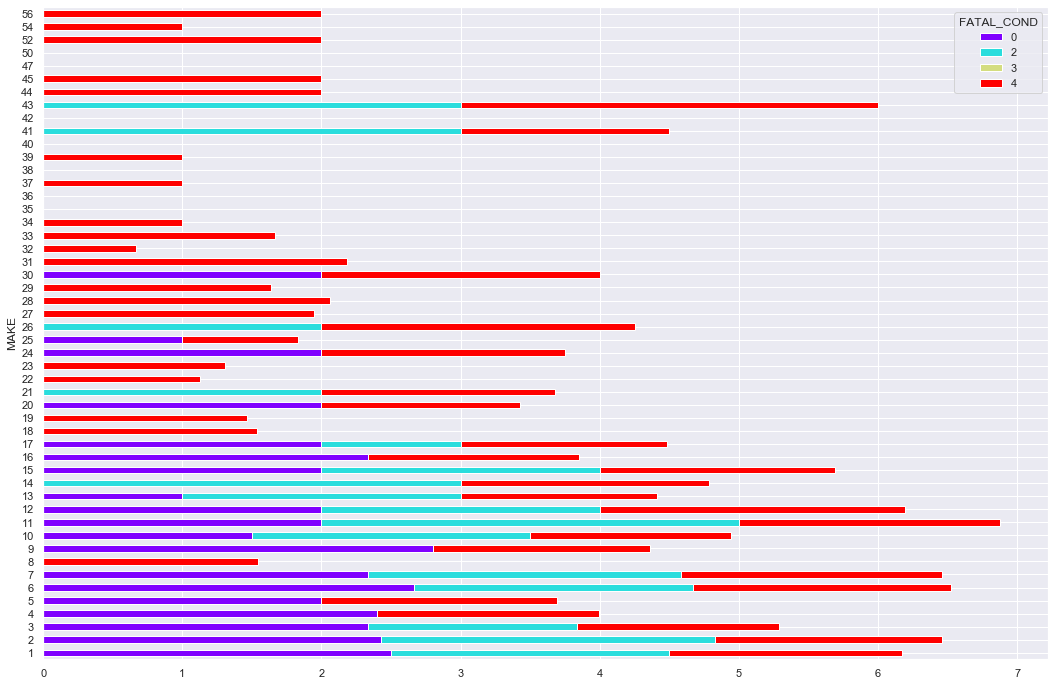

In [135]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2EDA.csv')
    .query('STATE == "IL"' and 'MAKE >= 0')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='FATAL_COND', 
        index='MAKE', 
        aggfunc='mean')
    .plot(kind='barh', figsize=(18,12), stacked=True, colormap='rainbow')
)

**VEHICLE MODEL**

{'OTHER_EXPLAIN_IN_NARRATIVE': 1, 'MOTORIZED': 2, 'CAMRY': 3, 'MALIBU': 4, 'ALTIMA': 5, 'IMPALA': 6, 

'ACCORD': 7, 'FUSION': 8, 'EXPLORER': 9, 'CHEROKEE': 10, 'SENTRA': 11, 'COROLLA': 12, 'CIVIC': 13, 

'EQUINOX': 14, 'SONATA': 15, 'ELANTRA': 16, 'OPTIMA_K5': 17, 'ROGUE': 18, 'ESCAPE': 19, 'CRUZE': 20, 

'CHARGER': 21, 'CARAVAN': 22, 'CR_V': 23, 'FOCUS': 24, 'GRAND_CHEROKEE': 25, '300': 26, 'TAHOE': 27, 

'RAV4': 28, 'MAXIMA': 29, 'TOWN_COUNTRY': 30, 'F150': 31, 'JETTA': 32, 'VERSA': 33, 'SANTA_FE': 34, 

'LACROSSE': 35, 'GRAND_PRIX': 36, 'SOUL': 37, 'ODYSSEY': 38, 'ENCLOSED_BODY': 39, 'PRIUS': 40, 

'JOURNEY': 41, 'SPORTAGE': 42, 'TRAIL_BLAZER': 43, 'DURANGO': 44, 'NEW_FLYER': 45, 'GRAND_CARAVAN': 46, 

'JEEP': 47, 'COMPASS': 48, 'VAN': 49, 'MURANO': 50, 'PATRIOT': 51, 'MAZDA3': 52, 'PASSAT': 53, 

'SILVERADO': 54, 'ACCENT': 55, 'RAM_1500_PU': 56, 'HIGHLANDER': 57, 'TRAX': 58, 'WRANGLER': 59, 

'TRUCK': 60, 'TLX': 61, 'SABLE': 62, 'CALIBER': 63, 'SIENNA': 64, 'MAZDA6': 65, 'OUTLANDER': 66, 

'200': 67, 'TAURUS': 68, 'AVENGER': 69, 'FORTE': 70, 'EDGE': 71, 'G6': 72, 'SORENTO': 73, 

'4RUNNER': 74, 'LESABRE': 75, 'SUBURBAN': 76, 'TRAVERSE': 77, 'ES300': 78, 'MOTORCYCLE': 79, 

'TRANSIT': 80, 'TUCSON': 81, 'EXPEDITION': 82, 'ESCALADE': 83, 'REGAL': 84, 'CHALLENGER': 85, 

'AVALON': 86, 'LIBERTY': 87, 'OPEN_BODY': 88, 'CAMARO': 89, 'MKZ': 90, 'X3': 91, 'NITRO': 92, 'ENGINE': 93, 

'FX35': 94, 'ZDX': 95, 'A4': 96, 'FIESTA': 97, 'RIO_K2': 98, 'COBALT': 99, 'ARMADA': 100, 'ACADIA': 101, 

'CENTURY': 102, 'RX300': 103, 'MATRIX': 104, 'X5': 105, 'BMW': 106, 'GALANT': 107, 'HARLEY_DAVIDSON': 108, 

'YARIS': 109, 'YUKON': 110, 'CL': 111, 'ES350': 112, 'HR_V': 113, 'CROSSTREK': 114, 'MUSTANG': 115, 

'CAVALIER': 116, 'ENVOY': 117, 'BLAZER': 118, 'RENEGADE': 119, 'PACIFICA': 120, 'TRANSIT_CONNECT': 121, 

'CX_5': 122, 'PT_CRUISER': 123, 'LS': 124, 'LAREDO': 125, 'A6': 126, 'SEQUOIA': 127, 'OUTBACK': 128, 

'MONTE_CARLO': 129, 'PATHFINDER': 130, 'CTS': 131, 'CAPRICE': 132, 'RENDEZVOUS': 133, 'Q50': 134, 

'AVALANCHE': 135, 'SRX': 136, 'MODEL_S': 137, 'JUKE': 138, 'FREIGHTLINER_CORP': 139, 'TRIBECA': 140, 

'ECOSPORT': 141, 'BEETLE': 142, 'DENALI': 143, 'ENDEAVOR': 144, 'M35': 145, 'FORESTER': 146, 

'LANCER': 147, 'TUNDRA': 148, 'SEBRING': 149, 'WINDSTAR': 150, '328I': 151, 'CONTINENTAL': 152, 

'TIGUAN': 153, 'PILOT': 154, 'TOWNCAR': 155, 'Q5': 156, 'DART': 157, 'MIRAGE': 158, 'JIMMY': 159, 

'TERRAIN': 160, 'EXPRESS': 161, 'ASTRO': 162, 'S10': 163, 'FIT': 164, 'AVEO': 165, 'GRAND_AM': 166, 

'SPECTRA': 167, 'GS350': 168, 'G37': 169, 'MKS': 170, 'BONNEVILLE': 171, 'CC': 172, 'XT5': 173, 

'GTI': 174, 'X_TERRA': 175, 'CX_9': 176, 'HHR': 177, '530I': 178, 'XF': 179, 'FIVE_HUNDRED': 180, 

'COOPER': 181, 'RLX': 182, 'LUCERNE': 183, 'SIERRA': 184, 'XC90': 185, 'ENCLAVE': 186, 'QUEST': 187, 

'FREESTAR': 188, 'GLE': 189, 'RANGE_ROVER_OF_NORTH_AMERICA': 190, 'MKX': 191, 'XB': 192, 'VUE': 193, 

'325I': 194, 'UPLANDER': 195, 'GLC': 196, 'GRAND_MARQUIS': 197, 'LAND_ROVER_SPORT': 198, 'RX350': 199, 

'NEON': 200, 'RANGE_ROVER_EVOQUE_SPORT_VELAR': 201, 'C300': 202, 'MONTANA': 203, 'YAMAHA': 204, 

'E500': 205, 'CROSSFIRE': 206, 'XJ': 207, 'VENZA': 208, 'C_HR': 209, 'GLADIATOR': 210, 'GLA': 211, 

'XTS': 212, '300M': 213, 'ECONOLINE_E150': 214, 'ECHO': 215, 'G35': 216, 'WAGONEER': 217, 

'ECONOLINE_E450': 218, 'BLUEBIRD_INTERNATIONAL': 219, 'CONSTRUCTION_EQUIPMENT': 220, 'WHEELS_ONLY': 221, 

'VIBE': 222, 'ES': 223, 'ATS': 224, 'X_TYPE': 225, 'CONCORD': 226, 'SPRINT': 227, 'KICKS': 228, 

'TRIBUTE': 229, 'PARK_AVENUE': 230, 'MOUNTAINEER': 231, 'QX50': 232, 'ML350': 233, 'TC': 234, 

'RAM_1500_VAN': 235, 'RAM_3500_PU': 236, 'RODEO': 237, 'NAVIGATOR': 238, 'NV_CARGO': 239, 'S60': 240, 

'SAVANNAH': 241, 'SEDONA': 242, 'H2': 243, 'GX460': 244, 'LEGACY': 245, 'STS': 246, 'MACK_TRUCKS_INC': 247, 

'ECONOLINE_E350': 248, 'ELDORADO': 249, 'ECLIPSE': 250, 'C_K_2500': 251, 'VENTURE': 252, 'QX70': 253, 

'PRISM': 254, 'CHEVETTE': 255, 'XJ8': 256, 'M37': 257, 'RANGER': 258, 'TACOMA': 259, 'RX330': 260, 

'ACHIEVA': 261, 'A5': 262, '940_SERIES': 263, 'MACAN': 264, 'VELOSTAR': 265, 'KONA': 266, 'IS300': 267, 

'FLEETWOOD': 268, 'FIREBIRD': 269, 'LS400': 270, 'ION': 271, 'ROADMASTER': 272, 'VERANO': 273, 'IMPREZA': 274, 

'HOMEMADE_MOTORCYCLE_MOPEDETC': 275, 'LS_SERIES_LS_LS1_LS2': 276, 'AURA': 277, 'RL': 278, 'RX450H': 279, 

'ATLAS': 280, 'S4': 281, 'AZERA': 282, 'INSIGHT': 283, 'RELAY': 284, 'RANGE_ROVER_PHEV': 285, 'S_TYPE': 286,

'INTERNATIONAL_HARVESTER': 287, 'B_SERIES': 288, 'C280': 289, 'RAM_2500_VAN': 290, 'INTREPID': 291, 

'RALLY': 292, 'CAYENNE': 293, 'UTILIMASTER_DIVISION_OF_HOLIDAY_RAMBLER_CORP': 294, 'AEROSTAR': 295, 

'ALERO': 296, 'GOLF': 297, '250_SERIES': 298, '3000_GT_SPYDER_3000_GT': 299, 'SPRINTER': 300, '300_SERIES': 301, 

'SOLARA': 302, 'SLX': 303, '370Z': 304, 'STRATUS': 305, '500_SERIES': 306, '520': 307, '528I': 308, 

'535_SERIES': 309, 'Q45': 310, '745I': 311, '750': 312, 'GS': 313, '99': 314, 'SELTOS': 315, 'GS400': 316, 

'A7': 317, 'SE': 318, 'HANDI_VAN': 319, 'SUNDANCE': 320, 'G5': 321, 'LTD': 322, 'QX30': 323, 

'XL_7_OR_XL_7_GRAND_VITARA': 324, 'CUSTOM': 325, 'FJ_CRUISER': 326, 'NAUTILUS': 327, 'C_CLASS': 328, 

'MX_6': 329, 'DAKOTA': 330, 'DELTA_88_OR_LSS': 331, 'VICTORIA': 332, 'DEVILLE': 333, 'MONTEREY': 334, 

'E320': 335, 'MODEL_E': 336, 'MODEL_3': 337, 'E_CLASS': 338, 'JEEP_GRAND_CHEROKEE': 339, 

'KENWORTH_MOTOR_TRUCK_CO': 340, 'ML320': 341, 'MAGNUM': 342, 'KIZASHI': 343, 'ELEMENT': 344, 

'MACK_TRAILER_MFG_CO_INC_DETRIOT_MI': 345, 'ENCORE': 346, 'LS8': 347, 'LX': 348, 'CX_3': 349, 'F450': 350, 

'NAVISTAR': 351, 'TITAN': 352, 'IS250': 353, 'PROTEGE': 354, 'TERCEL': 355, 'CLA': 356, 'CLS': 357, 

'COLORADO': 358, 'COMMANDER': 359, 'PICK_UP_MFG': 360, 'TRACKER': 361, 'PANAMERA': 362, 'CORVETTE': 363, 

'TOUAREG': 364, 'ULTRALIGHT': 365, 'CORONA': 366, 'SPIRIT': 367, 'XC60': 368, 'COUNTRYMAN': 369, 

'CROWN_VICTORIA': 370, 'NV200_COMPACT_CARGO': 371, 'SPARTAN_MOTORS_INC_MFD_IN_CHARLOTTE_MI': 372, 'QX60': 373, 

'IONIC': 374, '3_SERIES': 375, 'XYZ_TRAILER': 376, 'BLIMP': 377, 'EXCURSION': 378, 'F250': 379, 

'TRACKS_ONLY': 380, 'H3': 381, 'THUNDERBIRD': 382}

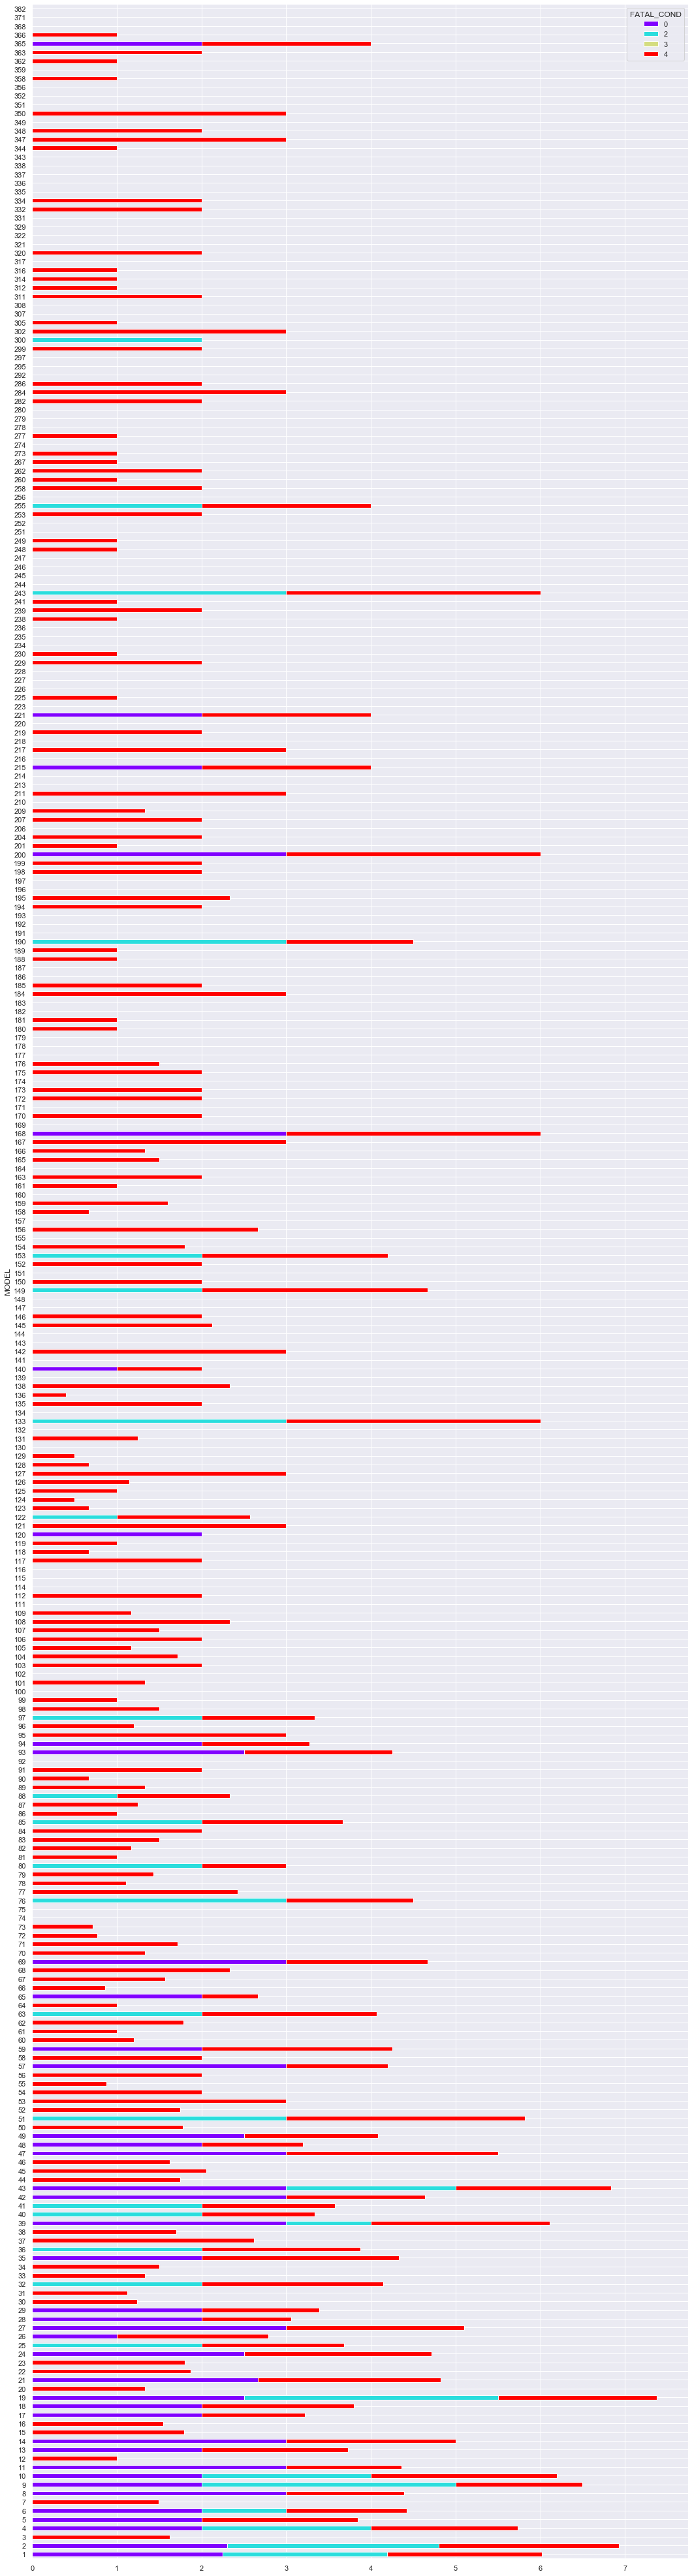

In [136]:
(
    pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_final2EDA.csv')
    .query('STATE == "IL"' and 'MODEL >= 0')
    .pivot_table(
        values='FATAL_DEGREE', 
        columns='FATAL_COND', 
        index='MODEL', 
        aggfunc='mean')
    .plot(kind='barh', figsize=(18,72), stacked=True, colormap='rainbow')
)

# A few more statistics

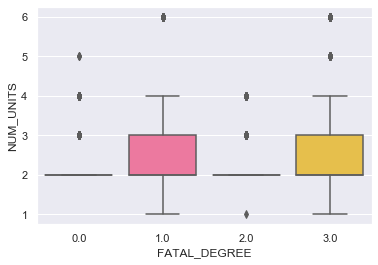

In [137]:
sns.boxplot(x='FATAL_DEGREE',
            y='NUM_UNITS',
            data=dfcovid2,
            palette='spring')

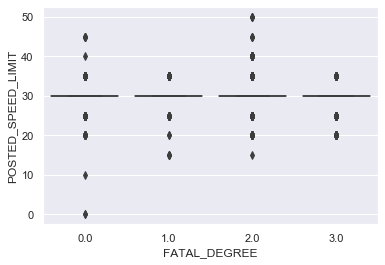

In [138]:
sns.boxplot(x='FATAL_DEGREE',
            y='POSTED_SPEED_LIMIT',
            data=dfcovid2,
            palette='summer')

In [139]:
dfcovid2['POSTED_SPEED_LIMIT'].describe()

count    2891.000000
mean       30.129713
std         2.910211
min         0.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        50.000000
Name: POSTED_SPEED_LIMIT, dtype: float64

In [140]:
dfcovid2.loc[dfcovid2['POSTED_SPEED_LIMIT']==0,'FATAL_DEGREE']

index
64143    0.0
64144    0.0
Name: FATAL_DEGREE, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [141]:
removed_speedLimit_rows = list(dfcovid2.loc[dfcovid2['POSTED_SPEED_LIMIT']==0,'FATAL_DEGREE'].index)
removed_speedLimit_rows

[64143, 64144]

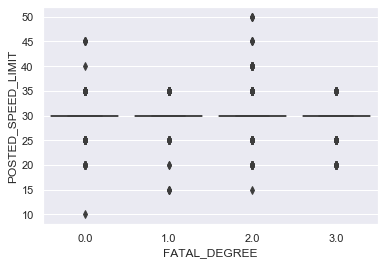

In [142]:
dfcovid2.drop(removed_speedLimit_rows, axis=0, inplace=True)
sns.boxplot(x='FATAL_DEGREE',
            y='POSTED_SPEED_LIMIT',
            data=dfcovid2,
            palette='summer')

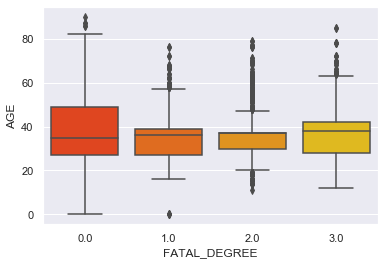

In [143]:
sns.boxplot(x='FATAL_DEGREE',
            y='AGE',
            data=dfcovid2,
            palette='autumn')

In [144]:
dfcovid2['AGE'].describe()

count    2889.000000
mean       37.194254
std        12.966972
min         0.000000
25%        28.000000
50%        36.900000
75%        42.000000
max        90.000000
Name: AGE, dtype: float64

In [145]:
dfcovid2.loc[dfcovid2['AGE']==0,'FATAL_DEGREE']

index
2565      0.0
8128      0.0
8129      0.0
18452     0.0
26684     0.0
33893     0.0
41177     1.0
41178     1.0
41238     0.0
41239     0.0
54376     0.0
66273     0.0
70864     0.0
70865     0.0
80565     0.0
108166    1.0
108167    1.0
113585    0.0
139366    0.0
Name: FATAL_DEGREE, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [146]:
removed_Age_rows = list(dfcovid2.loc[dfcovid2['AGE']==0,'FATAL_DEGREE'].index)
removed_Age_rows

[2565,
 8128,
 8129,
 18452,
 26684,
 33893,
 41177,
 41178,
 41238,
 41239,
 54376,
 66273,
 70864,
 70865,
 80565,
 108166,
 108167,
 113585,
 139366]

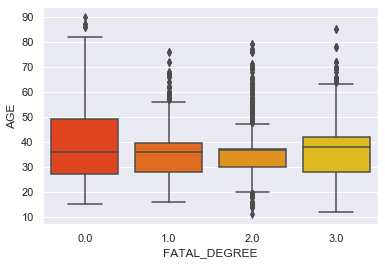

In [147]:
dfcovid2.drop(removed_Age_rows, axis=0, inplace=True)
sns.boxplot(x='FATAL_DEGREE',
            y='AGE',
            data=dfcovid2,
            palette='autumn')

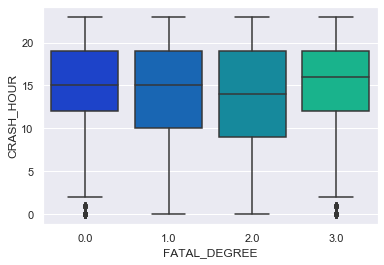

In [148]:
sns.boxplot(x='FATAL_DEGREE',
            y='CRASH_HOUR',
            data=dfcovid2,
            palette='winter')

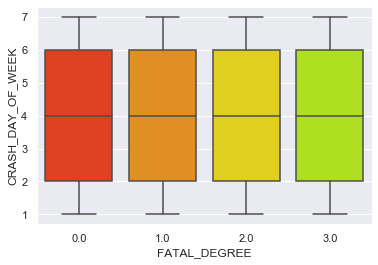

In [149]:
sns.boxplot(x='FATAL_DEGREE',
            y='CRASH_DAY_OF_WEEK',
            data=dfcovid2,
            palette='prism')

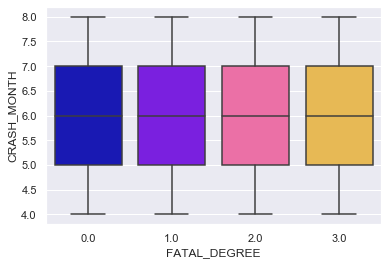

In [150]:
sns.boxplot(x='FATAL_DEGREE',
            y='CRASH_MONTH',
            data=dfcovid2,
            palette='gnuplot2')

In [151]:
dfcovid2.to_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalMODEL.csv')
dfcovid2.head()

,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,MODEL,...,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,FATAL_DEGREE,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE,DAMAGE_COST,FATAL_COND
index,,,,,,,,,,,,,,,,,,,,,
53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,37,...,5,4,2020,0.0,0,1,1,1,1,3


In [152]:
dfcovid2 = pd.read_csv('/Users/macbookpro/dsc-mod-3-project-v2-1-onl01-dtsc-ft-052620/COVID19_data/Traffic_Crashes_-_CPV_FatalDegree_finalMODEL.csv')
#dfcovid2.drop(['Unnamed: 0'], axis=1, inplace=True)
dfcovid2.set_index('index', inplace=True)
dfcovid2.head()

,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,MODEL,...,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,FATAL_DEGREE,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE,DAMAGE_COST,FATAL_COND
index,,,,,,,,,,,,,,,,,,,,,
53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,37,...,5,4,2020,0.0,0,1,1,1,1,3


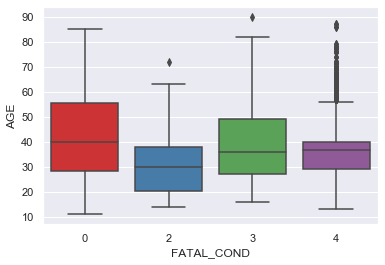

In [153]:
sns.boxplot(x='FATAL_COND',
            y='AGE',
            data=dfcovid2,
            palette='Set1')

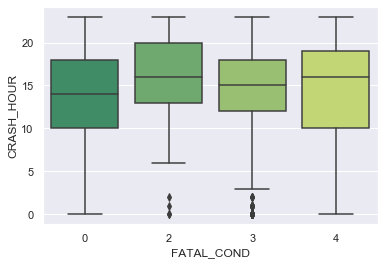

In [154]:
sns.boxplot(x='FATAL_COND',
            y='CRASH_HOUR',
            data=dfcovid2,
            palette='summer')